In [1010]:
%matplotlib inline
import xmitgcm
import xgcm
import xarray as xr
import matplotlib.pyplot as plt
from xlayers import finegrid, layers
from xlayers.core import layers_apply,layers_numpy
import numpy as np
from MITgcmutils import jmd95
import time as time

In [1274]:
#load mitgcm output where \kappa_{redi}=50 (modern)
#datadir='/Users/boerzhang/Desktop/ocean_project/restart_6x16_run_134308800_KGM_KGM2xonly_diag_testdiv_gTracer'
#datadir='/Users/boerzhang/Desktop/ocean_project/restart_6x16_run_134308800_KGM_KGM2xonly_diag_testdiv_GMadv_nobvp'
datadir='/Users/boerzhang/Desktop/ocean_project/restart_6x16_run_134308800_KGM_KGM2xonly_diag_testdiv_gTracer_skewflux_modGMdiagnose'
#iters=[152452800]
iters=[134308848]
prefixes=['Stave','Ttave','vVeltave','uVeltave','wVeltave','DIAG_tracer_adv_diff','PTRtave01','GMflux','Tdiftave','GM_Kwz-T','divergence','GMRediTensor']
dsGM2x=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
datadirADVForm='/Users/boerzhang/Desktop/ocean_project/restart_6x16_run_134308800_KGM_KGM2xonly_diag_testdiv_GMadv_nobvp'
prefixesADVForm=['Stave','Ttave','vVeltave','uVeltave','wVeltave','DIAG_tracer_adv_diff','PTRtave01','GMflux','Tdiftave','GM_Kwz-T','divergence','GM_PsiX','GM_PsiY','GMRediTensor','LaVH1RHO','LaUH1RHO']

dsGM2xADVForm=xmitgcm.open_mdsdataset(datadirADVForm,prefix=prefixesADVForm,iters=iters)
metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
    ('Z',): ['drF', 'drC'], # Z distances
    ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
}
grid = xgcm.Grid(dsGM2x, periodic=['X'], metrics=metrics)
dsGM2x.assign(GM_Age_r=dsGM2x.GM_Age_r*2)
dsGM2x.assign(GM_Age_x=dsGM2x.GM_Age_x*2)
dsGM2x.assign(GM_Age_y=dsGM2x.GM_Age_y*2)
dsGM2xADVForm
grid

<xgcm.Grid>
Z Axis (not periodic, boundary=None):
  * center   Z --> left
  * outer    Zp1 --> center
  * right    Zu --> center
  * left     Zl --> center
X Axis (periodic, boundary=None):
  * center   XC --> left
  * left     XG --> center
Y Axis (not periodic, boundary=None):
  * center   YC --> left
  * left     YG --> center
1RHO Axis (not periodic, boundary=None):
  * center   layer_1RHO_center --> outer
  * outer    layer_1RHO_bounds --> center
  * inner    layer_1RHO_interface --> center
T Axis (not periodic, boundary=None):
  * center   time

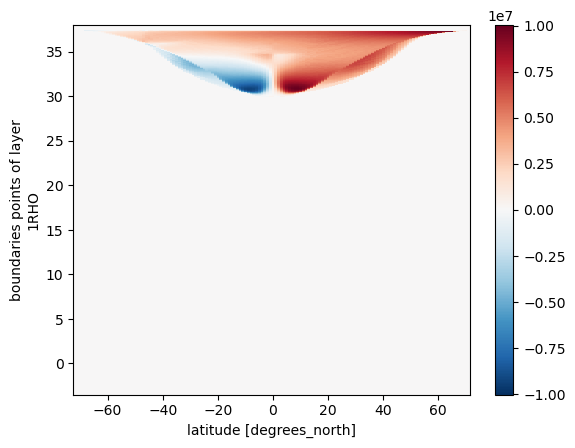

In [137]:
#
modifiedGMTensor=True
if modifiedGMTensor is True:
    Kgm=1000
    Kredi=500
    GM_Kuz_gm=-dsGM2x.GM_Kuz.mean('time')*Kgm
    GM_Kvy_gm=-dsGM2x.GM_Kvy.mean('time')*Kgm
    GM_Kwx_gm=dsGM2x.GM_Kwx.mean('time')*Kgm
    GM_Kwy_gm=dsGM2x.GM_Kwy.mean('time')*Kgm
    
    
else:
    Kgm=1000
    Kredi=500
    GM_Kuz_gm=dsGM2x.GM_Kuz.mean('time')*Kgm/(Kgm-Kredi)
    GM_Kvy_gm=dsGM2x.GM_Kvy.mean('time')*Kgm/(Kgm-Kredi)
    GM_Kwx_gm=dsGM2x.GM_Kwx.mean('time')*Kgm/(Kgm+Kredi)
    GM_Kwy_gm=dsGM2x.GM_Kwy.mean('time')*Kgm/(Kgm+Kredi)
#fGMx_cgrid=GM_Kux_gm*

In [341]:
wgmFromTensor.sum('XC').sum('YC').load()

<xarray.DataArray (Zl: 30)>
array([ 0.        ,  0.08083706,  8.15118804, 10.47175049, 11.24813919,
       11.48611003, 10.70018099, 11.59306234, 15.9209441 , 19.38311651,
       19.63995033, 17.55363865, 19.42710105, 13.87685268, 15.42396229,
       32.82593855, 20.55084738, 19.30939164, 20.21439911, 13.90633054,
       11.65136534,  7.15194061,  5.88829412,  3.33075888,  4.20807388,
       -3.68302546, -4.64756923,  0.52839699,  8.68305313,  3.55395607])
Coordinates:
  * Zl       (Zl) >f4 0.0 -20.0 -40.0 -60.0 ... -3.25e+03 -3.5e+03 -3.75e+03

In [336]:
wgmFromSkewflux.sum('XC').sum('YC').load()

<xarray.DataArray (Zl: 30)>
array([ 0.0000000e+00, -1.1935065e-04, -4.5297333e-04, -2.4394001e-04,
       -2.4156623e-04, -3.8209168e-04,  1.5143059e-04,  2.6990165e-04,
       -2.7620255e-03,  9.2106353e-04,  1.1471882e-03,  7.4834959e-04,
        9.6297392e-04,  1.3885120e-03,  1.4024765e-03,  1.5260521e-03,
        9.0472528e-04,  8.7095681e-04,  7.5138186e-04,  8.0045220e-04,
        4.0323962e-04, -9.5753587e-04,  1.7053707e-04,  1.7934229e-04,
       -9.6058357e-05, -1.4843920e-04,  3.6461002e-05,  1.2918648e-04,
        1.4279300e-04,  1.2834511e-04], dtype=float32)
Coordinates:
  * Zl       (Zl) >f4 0.0 -20.0 -40.0 -60.0 ... -3.25e+03 -3.5e+03 -3.75e+03

/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


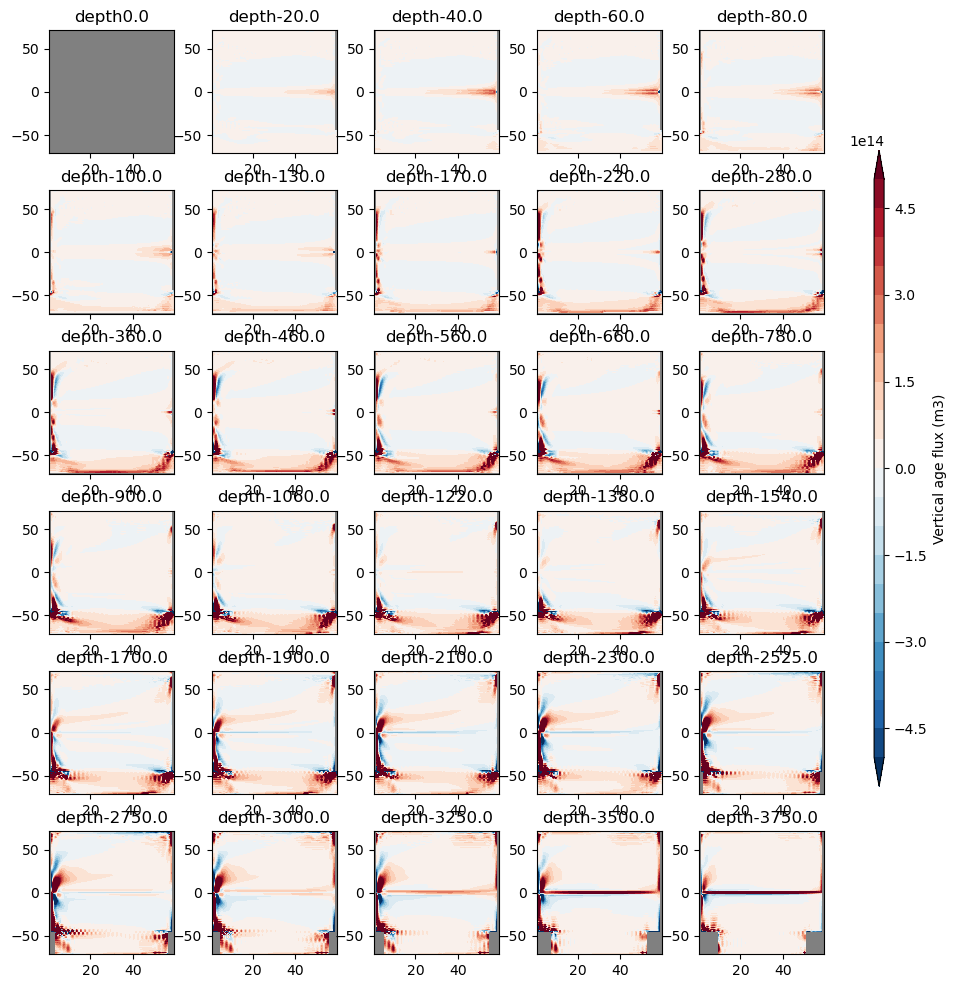

In [7]:
#visualize vertical age advection
fig = plt.figure(figsize=(10,12))
for i in range(0,30):
    plt.subplot(6,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
   
    #plt.colorbar()
    plt.title("depth"+str(dsGM2x.Zl[i].data))
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey")  
fig.subplots_adjust(wspace=0.3,hspace=0.3)
cbar_ax = fig.add_axes([0.95, 0.25, 0.01, 0.53])
fig.colorbar(im,cbar_ax,label='Vertical age flux (m3)')
    

/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


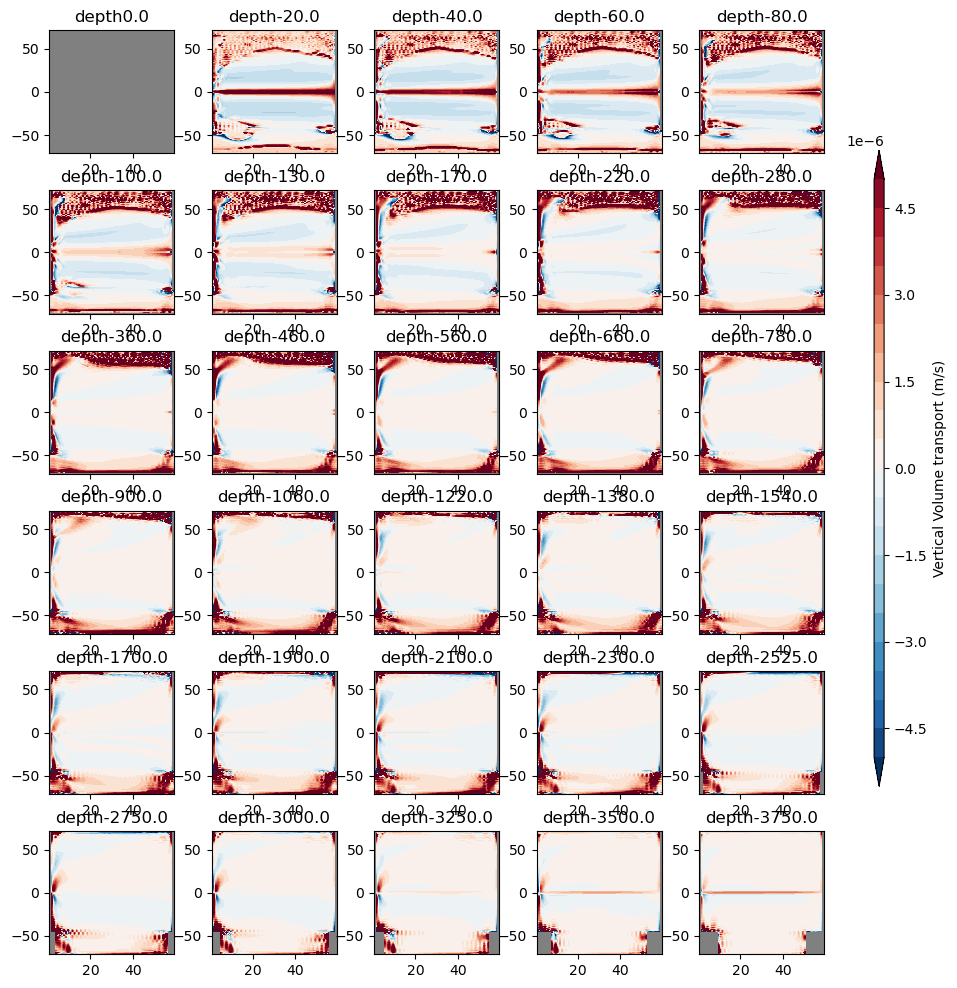

In [8]:
#visualize vertical age advection
wVolume=((dsGM2x.wVeltave+wGM)).where(dsGM2x.wVeltave!=0)
fig = plt.figure(figsize=(10,12))
for i in range(0,30):
    plt.subplot(6,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=dsGM2x.W.where(dsGM2x.W!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False)
    im=wVolume.isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e-6,add_colorbar=False,extend='both')

    #plt.colorbar()
    plt.title("depth"+str(dsGM2x.Zl[i].data))
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey")  
fig.subplots_adjust(wspace=0.3,hspace=0.3)
cbar_ax = fig.add_axes([0.95, 0.25, 0.01, 0.53])
fig.colorbar(im,cbar_ax,label='Vertical Volume transport (m/s)')

/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


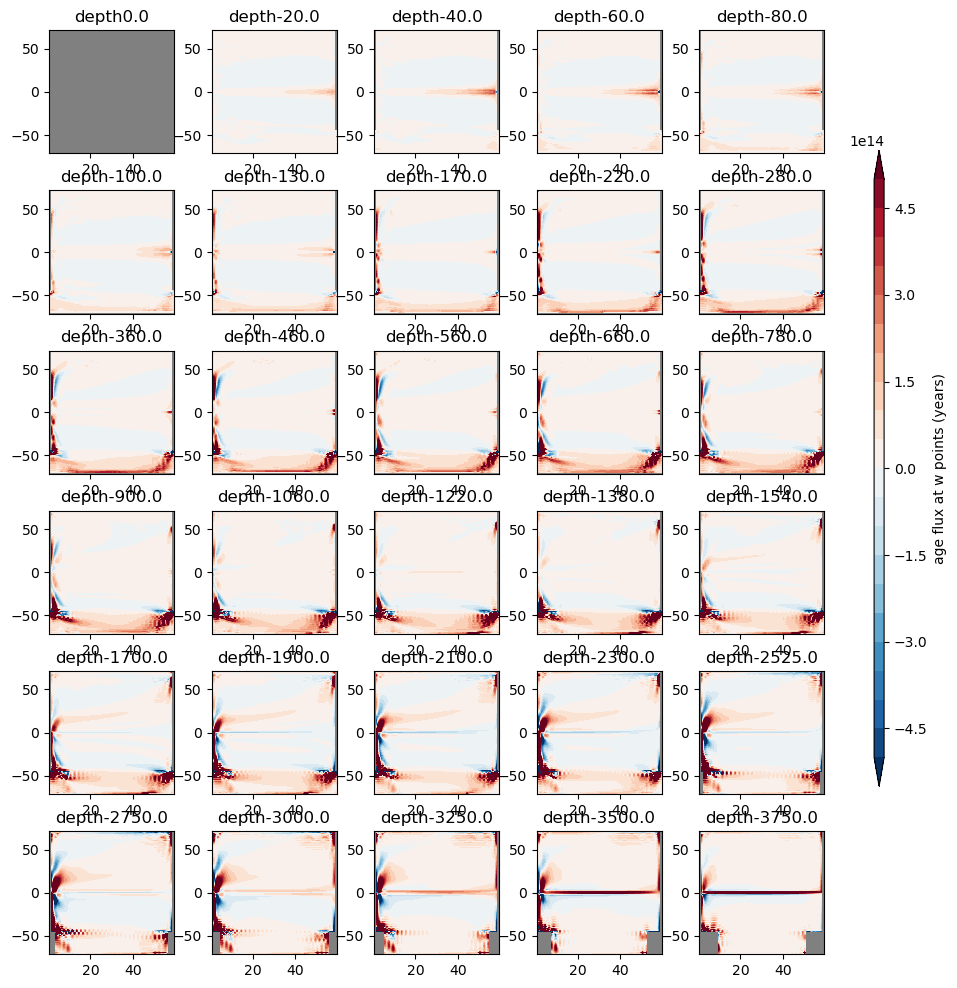

In [9]:
age=age.where(age!=0)
wVolume=((dsGM2x.wVeltave+wGM)*dsGM2x.rA).where(dsGM2x.wVeltave!=0)

myvageflux=agel*wVolume
fig = plt.figure(figsize=(10,12))
for i in range(0,30):
    plt.subplot(6,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=dsGM2x.W.where(dsGM2x.W!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False)
    #im=(agel).where(dsGM2x.W!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e4,add_colorbar=False,extend='neither')
    im=(myvageflux).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')

    #plt.colorbar()
    plt.title("depth"+str(dsGM2x.Zl[i].data))
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey")  
fig.subplots_adjust(wspace=0.3,hspace=0.3)
cbar_ax = fig.add_axes([0.95, 0.25, 0.01, 0.53])
fig.colorbar(im,cbar_ax,label='age flux at w points (years)')

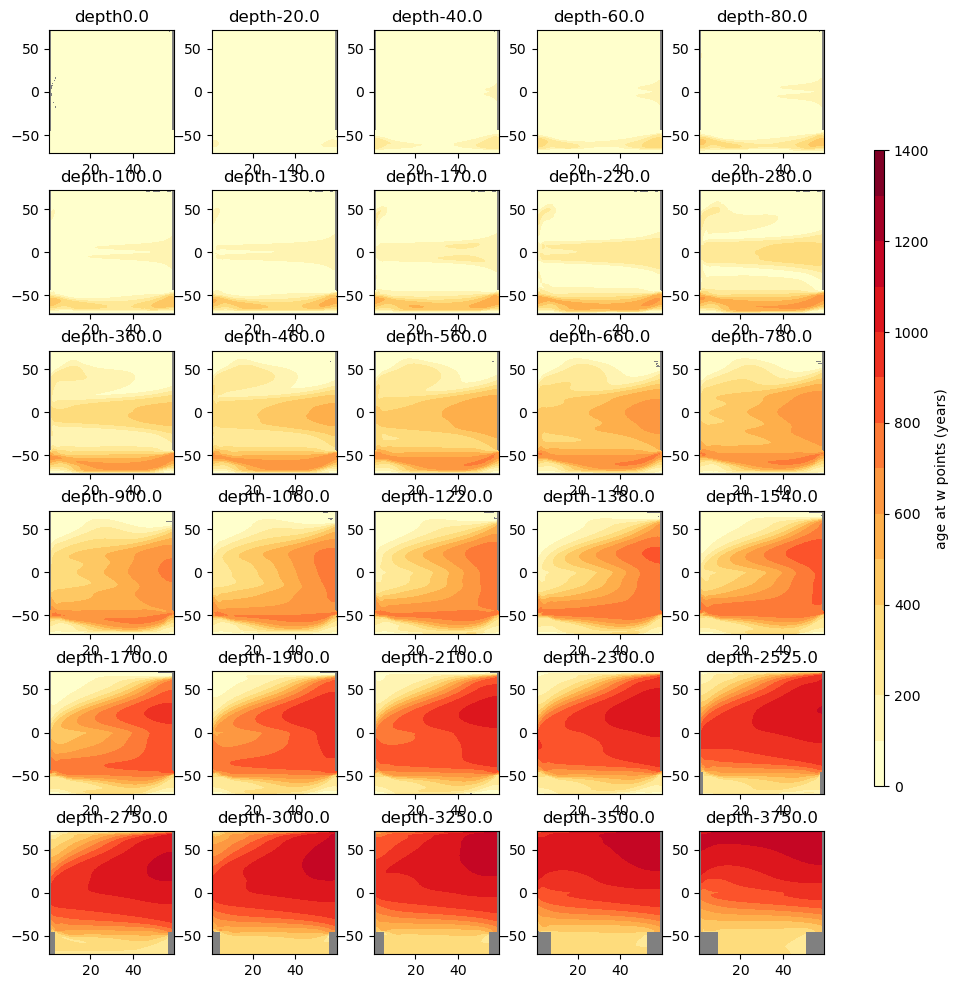

In [10]:
age=dsGM2x.PTRtave01
age=age.where(age!=0)
#age at Zl
agel=grid.interp(age, 'Z',boundary='fill')
fig = plt.figure(figsize=(10,12))
for i in range(0,30):
    plt.subplot(6,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=dsGM2x.W.where(dsGM2x.W!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False)
    #im=(agel).where(dsGM2x.W!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e4,add_colorbar=False,extend='neither')
    im=(agel/31104000).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(0,1450,100),add_colorbar=False,extend='neither',cmap=plt.cm.YlOrRd)

    #plt.colorbar()
    plt.title("depth"+str(dsGM2x.Zl[i].data))
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey")  
fig.subplots_adjust(wspace=0.3,hspace=0.3)
cbar_ax = fig.add_axes([0.95, 0.25, 0.01, 0.53])
fig.colorbar(im,cbar_ax,label='age at w points (years)')

/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


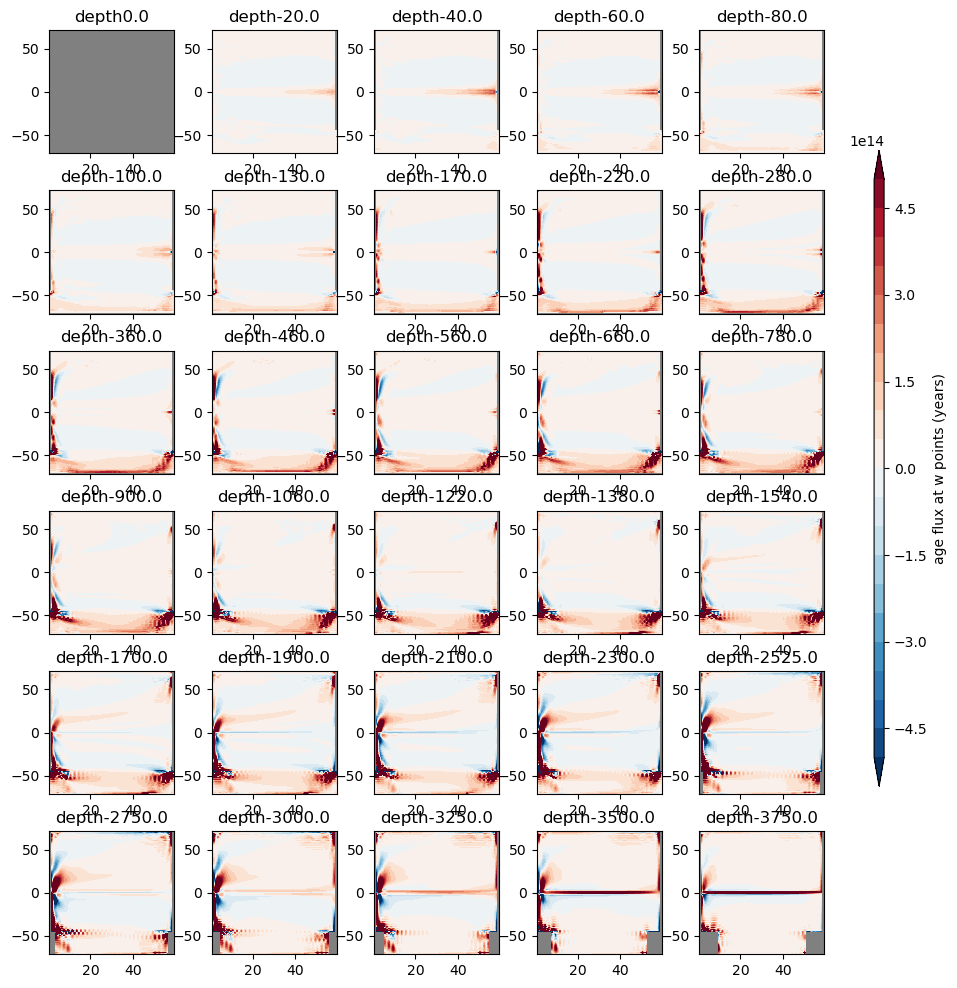

In [11]:
GM_x=dsGM2x.GM_Age_r.where(dsGM2x.ADVrTr01!=0).mean('time');
GM_y=dsGM2x.GM_Age_r.where(dsGM2x.ADVrTr01!=0).mean('time');
GM_r=dsGM2x.GM_Age_r.where(dsGM2x.ADVrTr01!=0).mean('time');


age=age.where(age!=0)
wVolume=((dsGM2x.wVeltave+wGM)*dsGM2x.rA).where(dsGM2x.wVeltave!=0)

myvageflux=agel*wVolume
fig = plt.figure(figsize=(10,12))
for i in range(0,30):
    plt.subplot(6,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=dsGM2x.W.where(dsGM2x.W!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False)
    #im=(agel).where(dsGM2x.W!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e4,add_colorbar=False,extend='neither')
    im=(myvageflux).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')

    #plt.colorbar()
    plt.title("depth"+str(dsGM2x.Zl[i].data))
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey")  
fig.subplots_adjust(wspace=0.3,hspace=0.3)
cbar_ax = fig.add_axes([0.95, 0.25, 0.01, 0.53])
fig.colorbar(im,cbar_ax,label='age flux at w points (years)')

In [12]:
from scipy.stats import gaussian_kde
def dens4scatter_kde(x,y):
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    return z

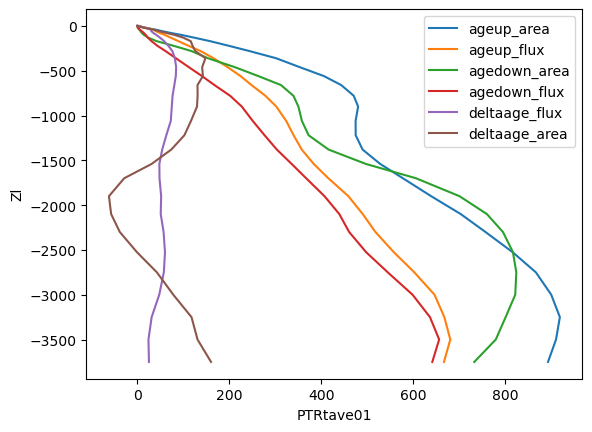

In [13]:
agetmean=agel.mean('time')/31104000
wVolume=(dsGM2x.wVeltave).where(dsGM2x.wVeltave!=0)
wVolumetmean=wVolume.mean('time')
wVolumepos=wVolumetmean.where(wVolumetmean>0)
agepos=agetmean.where(wVolumetmean>0)
wVolumeneg=wVolumetmean.where(wVolumetmean<0)
ageneg=agetmean.where(wVolumetmean<0)

agepos_areamean=grid.average(agepos,['X','Y'])
ageneg_areamean=grid.average(ageneg,['X','Y'])
agepos_fluxmean=grid.average(agepos*wVolumepos,['X','Y'])/grid.average(wVolumepos,['X','Y'])
ageneg_fluxmean=grid.average(ageneg*wVolumeneg,['X','Y'])/grid.average(wVolumeneg,['X','Y'])
deltaage_flux=-(ageneg_fluxmean-agepos_fluxmean)
deltaage_area=-(ageneg_areamean-agepos_areamean)
agepos_areamean.plot(y='Zl',label='ageup_area')
agepos_fluxmean.plot(y='Zl',label='ageup_flux')
ageneg_areamean.plot(y='Zl',label='agedown_area')
ageneg_fluxmean.plot(y='Zl',label='agedown_flux')
deltaage_flux.plot(y='Zl',label='deltaage_flux')
deltaage_area.plot(y='Zl',label='deltaage_area')
plt.legend()



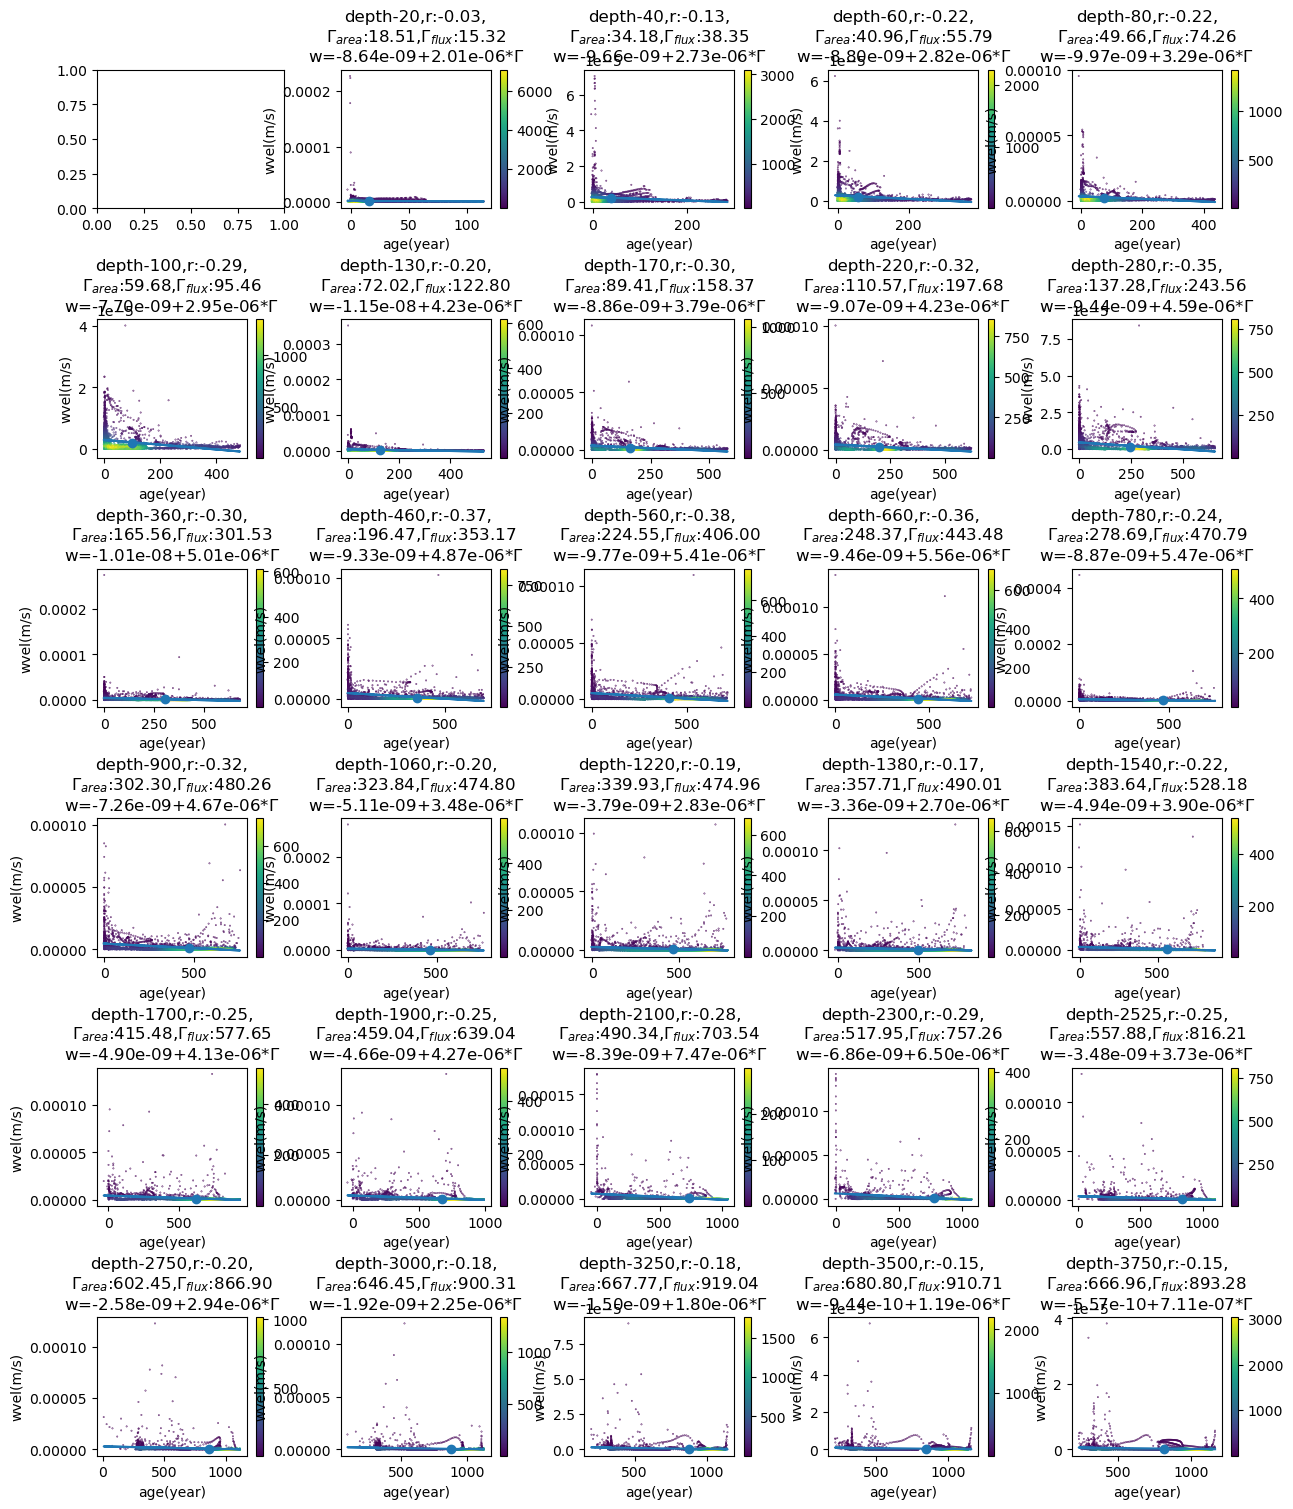

In [14]:
agetmean=agel.mean('time')/31104000
wVolume=(dsGM2x.wVeltave+wGM).where(dsGM2x.wVeltave!=0)
wVolumetmean=wVolume.mean('time')
wVolumepos=wVolumetmean.where(wVolumetmean>0)
agepos=agetmean.where(wVolumetmean>0)
wVolumeneg=wVolumetmean.where(wVolumetmean<0)
ageneg=agetmean.where(wVolumetmean<0)
fig = plt.figure(figsize=(15,18))
for i in range(0,30):
    
    plt.subplot(6,5, i+1)
    if i==0:
        continue
    xup=agepos.isel(Zl=i)
    xup=np.reshape(xup.load(),[1,144*60])
    xup=xup.data
    xup=xup[~np.isnan(xup)]
    yup=wVolumepos.isel(Zl=i)
    yup=np.reshape(yup,[1,144*60])
    yup=yup.data
    yup=yup[~np.isnan(yup)]
    zup=dens4scatter_kde(xup,yup)
    sc=plt.scatter(xup,yup,c=zup,s=0.1)
    plt.colorbar(sc)
    #plt.scatter(ageneg.isel(Zl=i),wVolumeneg.isel(Zl=i),s=0.1)
    xmean=grid.average(agepos.isel(Zl=i),['X','Y'])
    ymean=grid.average(wVolumepos.isel(Zl=i),['X','Y'])
    #plt.ylim(0,6*ymean ) 
    #plt.xlim(0,6*xmean ) 
    plt.scatter(xmean,ymean)
    fitcoef=np.polyfit(xup,yup,1)
    fiteq=np.poly1d(fitcoef)
    yfit=fiteq(xup)
    plt.plot(xup,yfit)
    #plt.title("depth%d"%dsGM2x.Zl[i].data+",r:%.2f"%np.corrcoef(xup,yup)[0,1]+",w=%.2e+%.2e*$\Gamma$"%(fitcoef[0],fitcoef[1]))
    plt.title("depth%d"%dsGM2x.Zl[i].data+",r:%.2f"%np.corrcoef(xup,yup)[0,1]+",\n$\Gamma_{area}$:%.2f,$\Gamma_{flux}$:%.2f"%(agepos_fluxmean[i].load().data,agepos_areamean[i].load().data)+"\nw=%.2e+%.2e*$\Gamma$"%(fitcoef[0],fitcoef[1]))
    #plt.title("depth%d"%dsGM2x.Zl[i].data+",r:%.2f\n")
    plt.xlabel('age(year)')
    plt.ylabel('wvel(m/s)')
    #plt.scatter(grid.average(ageneg.isel(Zl=i),['X','Y']),wVolumeneg.isel(Zl=i).mean('XC').mean('YC'))
     
fig.subplots_adjust(wspace=0.3,hspace=0.8)

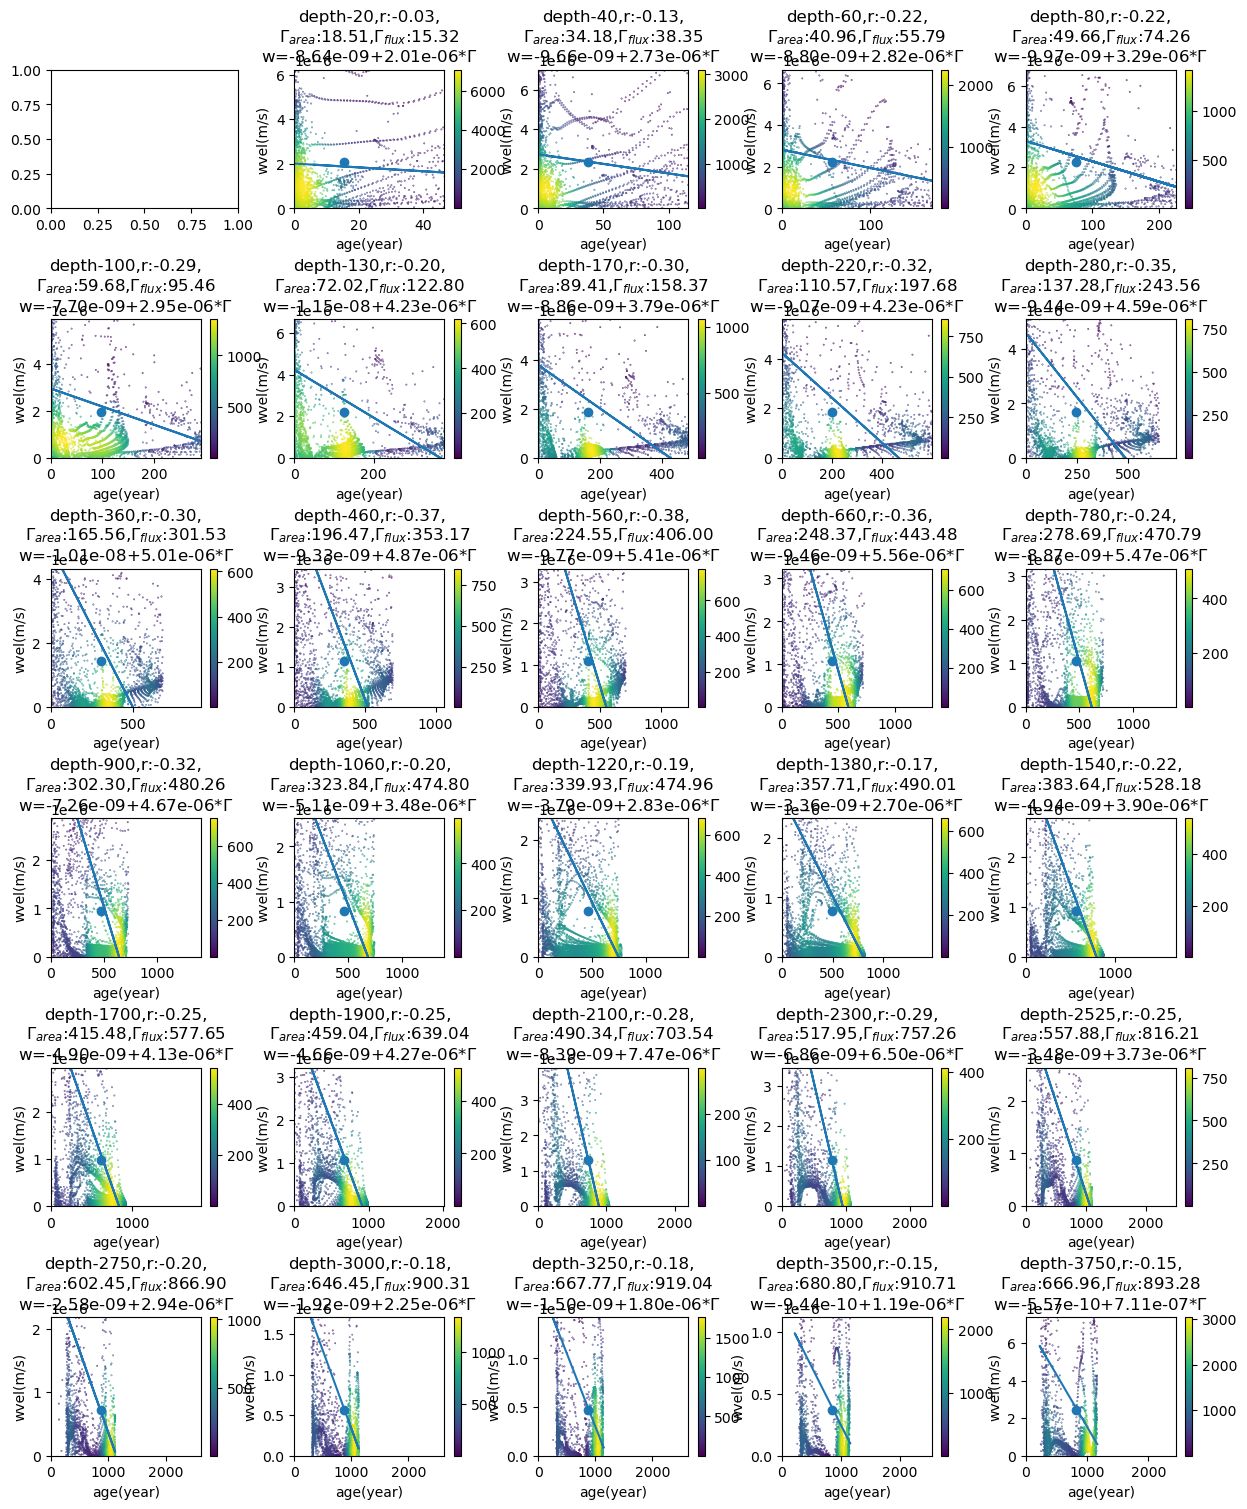

In [15]:
agetmean=agel.mean('time')/31104000
wVolume=(dsGM2x.wVeltave+wGM).where(dsGM2x.wVeltave!=0)
wVolumetmean=wVolume.mean('time')
wVolumepos=wVolumetmean.where(wVolumetmean>0)
agepos=agetmean.where(wVolumetmean>0)
wVolumeneg=wVolumetmean.where(wVolumetmean<0)
ageneg=agetmean.where(wVolumetmean<0)
fig = plt.figure(figsize=(15,18))
for i in range(0,30):
    
    plt.subplot(6,5, i+1)
    if i==0:
        continue
    xup=agepos.isel(Zl=i)
    xup=np.reshape(xup.load(),[1,144*60])
    xup=xup.data
    xup=xup[~np.isnan(xup)]
    yup=wVolumepos.isel(Zl=i)
    yup=np.reshape(yup,[1,144*60])
    yup=yup.data
    yup=yup[~np.isnan(yup)]
    zup=dens4scatter_kde(xup,yup)
    sc=plt.scatter(xup,yup,c=zup,s=0.1)
    plt.colorbar(sc)
    #plt.scatter(ageneg.isel(Zl=i),wVolumeneg.isel(Zl=i),s=0.1)
    xmean=grid.average(agepos.isel(Zl=i),['X','Y'])
    ymean=grid.average(wVolumepos.isel(Zl=i),['X','Y'])
    plt.ylim(0,3*ymean ) 
    plt.xlim(0,3*xmean ) 
    plt.scatter(xmean,ymean)
    fitcoef=np.polyfit(xup,yup,1)
    fiteq=np.poly1d(fitcoef)
    yfit=fiteq(xup)
    plt.plot(xup,yfit)
    #plt.title("depth%d"%dsGM2x.Zl[i].data+",r:%.2f"%np.corrcoef(xup,yup)[0,1]+",w=%.2e+%.2e*$\Gamma$"%(fitcoef[0],fitcoef[1]))
    plt.title("depth%d"%dsGM2x.Zl[i].data+",r:%.2f"%np.corrcoef(xup,yup)[0,1]+",\n$\Gamma_{area}$:%.2f,$\Gamma_{flux}$:%.2f"%(agepos_fluxmean[i].load().data,agepos_areamean[i].load().data)+"\nw=%.2e+%.2e*$\Gamma$"%(fitcoef[0],fitcoef[1]))
    #plt.title("depth%d"%dsGM2x.Zl[i].data+",r:%.2f\n")
    plt.xlabel('age(year)')
    plt.ylabel('wvel(m/s)')
    #plt.scatter(grid.average(ageneg.isel(Zl=i),['X','Y']),wVolumeneg.isel(Zl=i).mean('XC').mean('YC'))
     
fig.subplots_adjust(wspace=0.3,hspace=0.8)

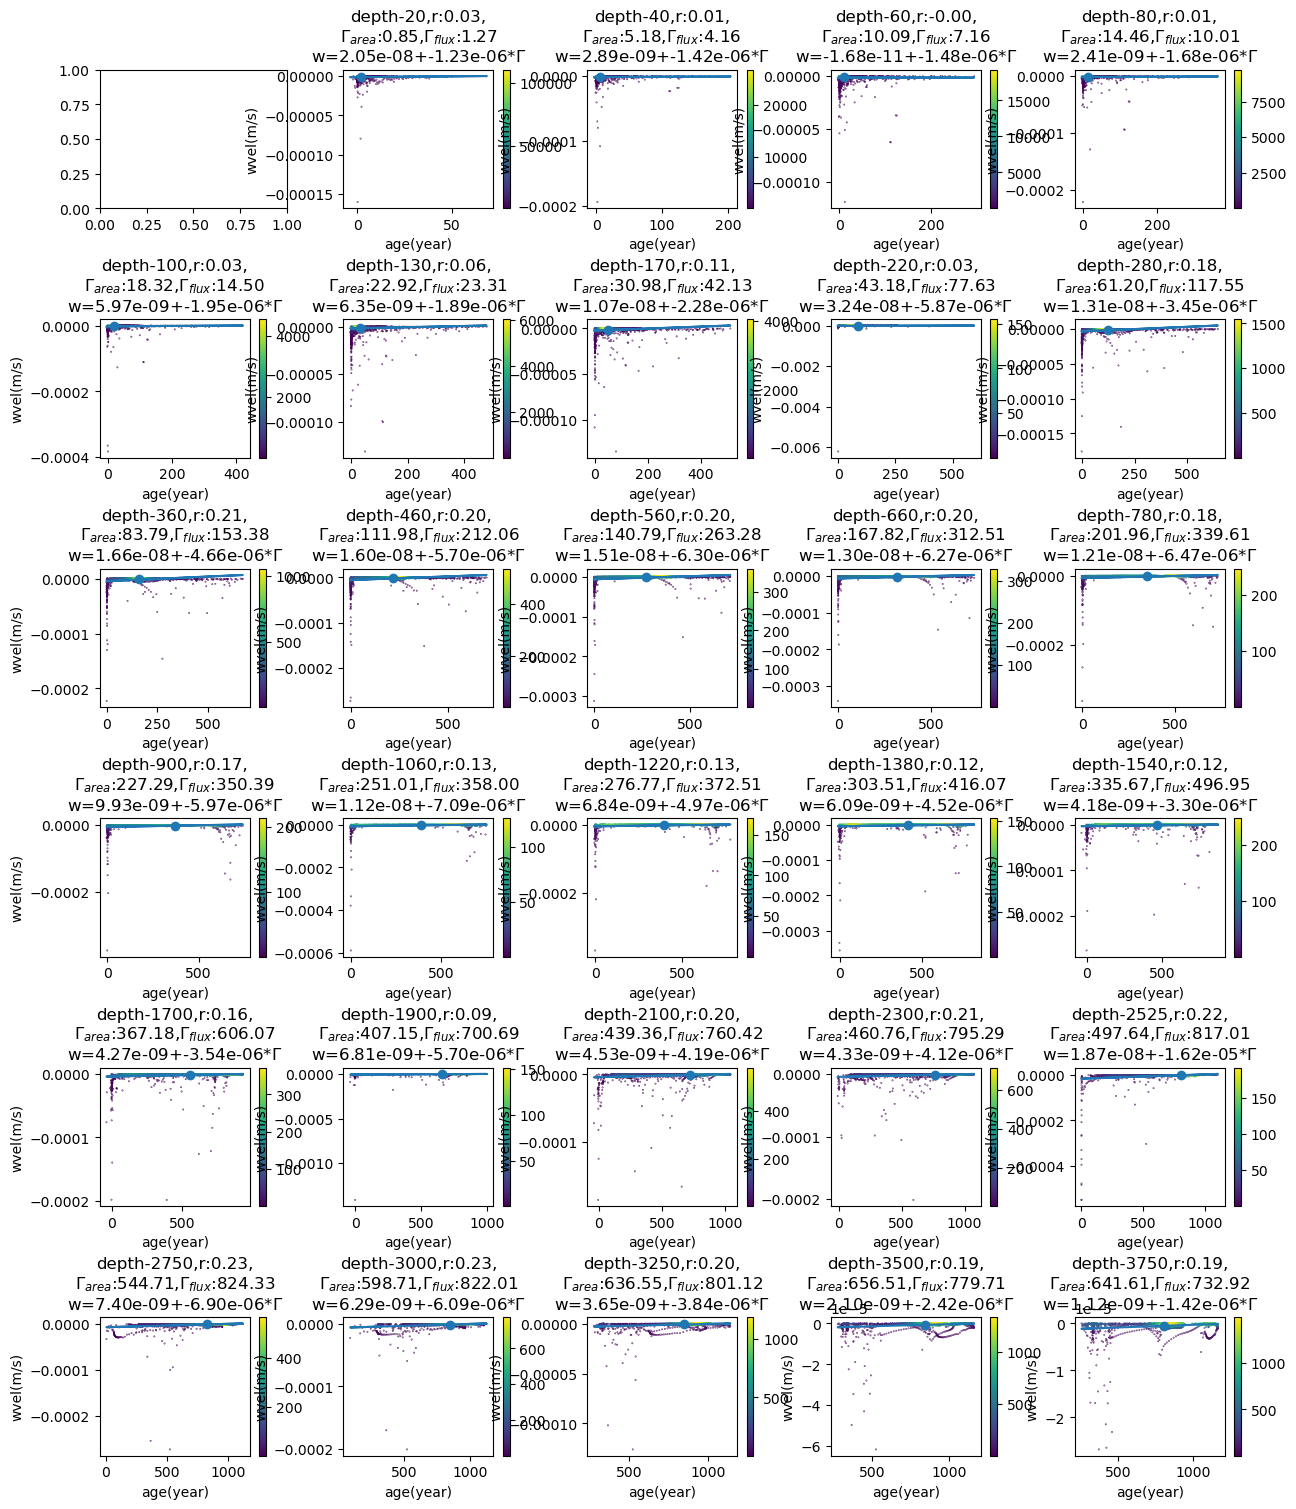

In [16]:
agetmean=agel.mean('time')/31104000
wVolume=(dsGM2x.wVeltave+wGM).where(dsGM2x.wVeltave!=0)
wVolumetmean=wVolume.mean('time')
wVolumepos=wVolumetmean.where(wVolumetmean>0)
agepos=agetmean.where(wVolumetmean>0)
wVolumeneg=wVolumetmean.where(wVolumetmean<0)
ageneg=agetmean.where(wVolumetmean<0)
fig = plt.figure(figsize=(15,18))
for i in range(0,30):
    plt.subplot(6,5, i+1)
    if i==0:
        continue
    xup=ageneg.isel(Zl=i)
    xup=np.reshape(xup.load(),[1,144*60])
    xup=xup.data
    xup=xup[~np.isnan(xup)]
    yup=wVolumeneg.isel(Zl=i)
    yup=np.reshape(yup,[1,144*60])
    yup=yup.data
    yup=yup[~np.isnan(yup)]
    zup=dens4scatter_kde(xup,yup)
    sc=plt.scatter(xup,yup,c=zup,s=0.1)
    plt.colorbar(sc)
    #plt.scatter(ageneg.isel(Zl=i),wVolumeneg.isel(Zl=i),s=0.1)
    xmean=grid.average(ageneg.isel(Zl=i),['X','Y'])
    ymean=grid.average(wVolumeneg.isel(Zl=i),['X','Y'])
    #plt.ylim(3*ymean,0 ) 
    #plt.xlim(0,3*xmean) 
    plt.scatter(xmean,ymean)
    #plt.scatter(grid.average(ageneg.isel(Zl=i),['X','Y']),wVolumeneg.isel(Zl=i).mean('XC').mean('YC'))
    fitcoef=np.polyfit(xup,yup,1)
    fiteq=np.poly1d(fitcoef)
    yfit=fiteq(xup)
    plt.plot(xup,yfit)
    #plt.title("depth%d"%dsGM2x.Zl[i].data+",r:%.2f"%np.corrcoef(xup,yup)[0,1]+",w=%.2e+%.2e*$\Gamma$"%(fitcoef[0],fitcoef[1]))
    plt.title("depth%d"%dsGM2x.Zl[i].data+",r:%.2f"%np.corrcoef(xup,yup)[0,1]+",\n$\Gamma_{area}$:%.2f,$\Gamma_{flux}$:%.2f"%(ageneg_fluxmean[i].load().data,ageneg_areamean[i].load().data)+"\nw=%.2e+%.2e*$\Gamma$"%(fitcoef[0],fitcoef[1]))
    #plt.title("depth%d"%dsGM2x.Zl[i].data+",r:%.2f\n")
    plt.xlabel('age(year)')
    plt.ylabel('wvel(m/s)')
    #plt.scatter(grid.average(ageneg.isel(Zl=i),['X','Y']),wVolumeneg.isel(Zl=i).mean('XC').mean('YC'))
     
fig.subplots_adjust(wspace=0.3,hspace=0.8)
     
#fig.subplots_adjust(wspace=0.3,hspace=0.3)

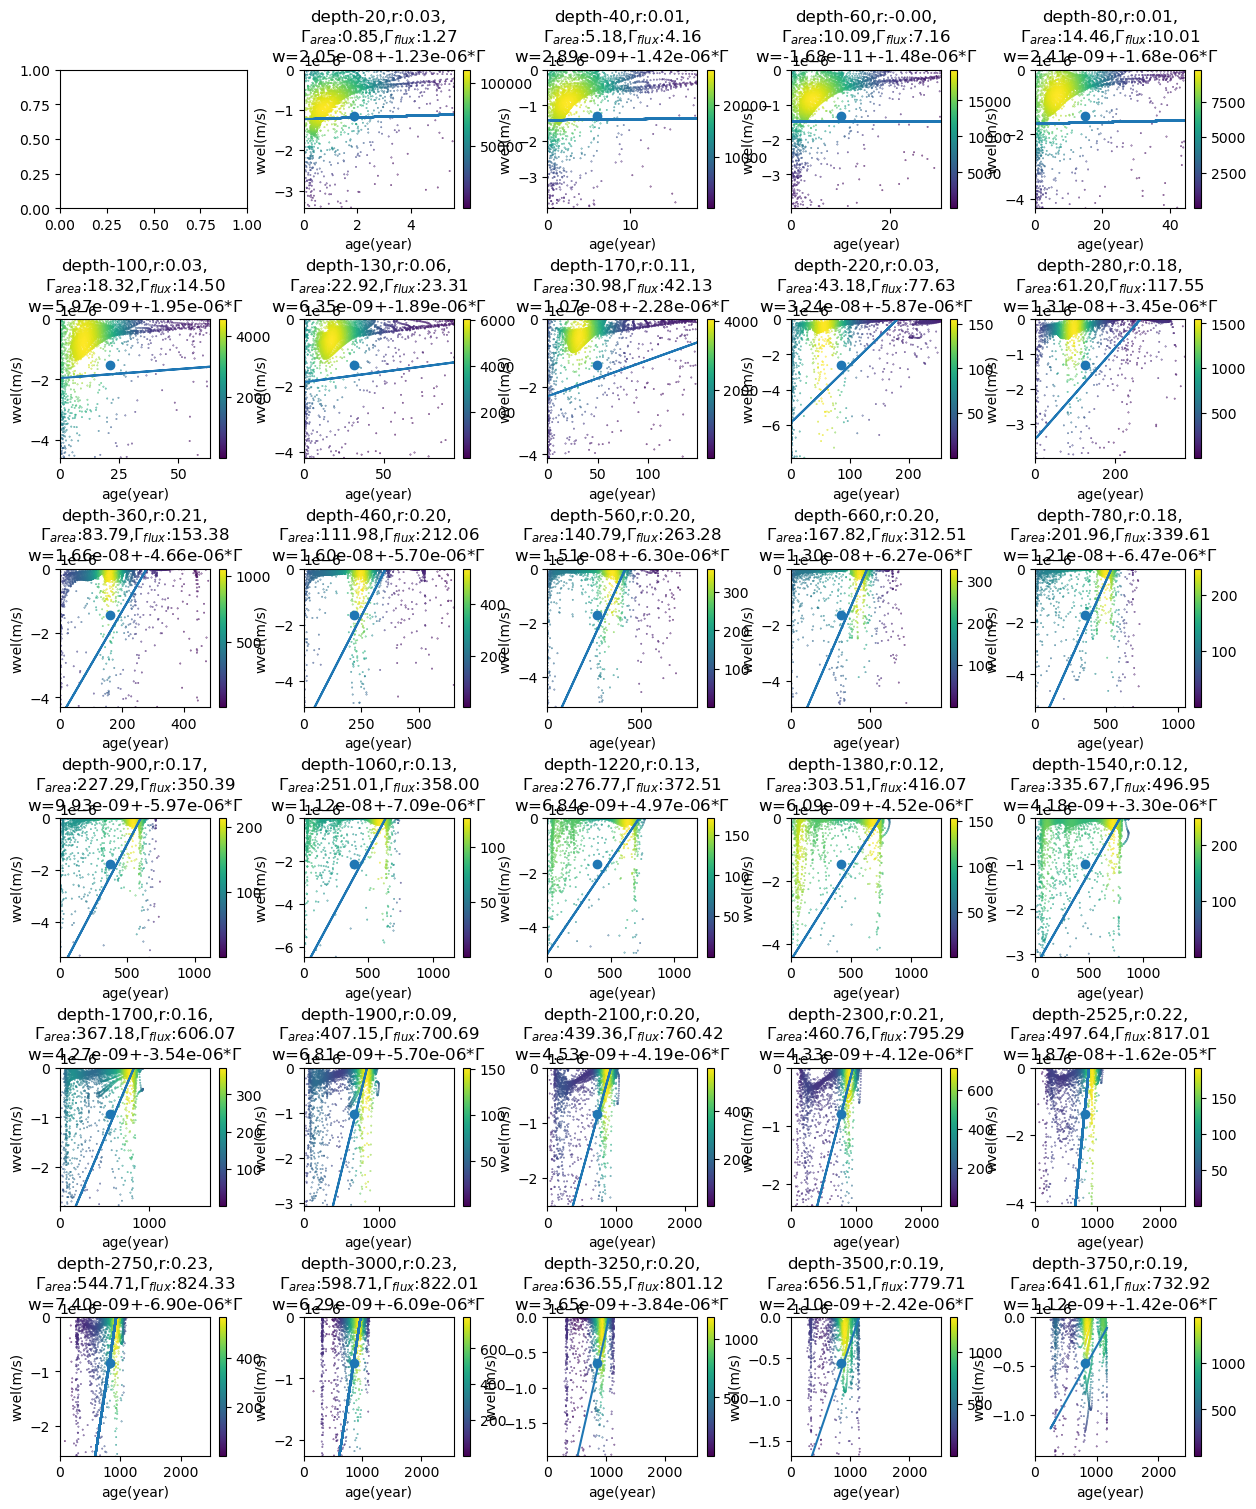

In [17]:
agetmean=agel.mean('time')/31104000
wVolume=(dsGM2x.wVeltave+wGM).where(dsGM2x.wVeltave!=0)
wVolumetmean=wVolume.mean('time')
wVolumepos=wVolumetmean.where(wVolumetmean>0)
agepos=agetmean.where(wVolumetmean>0)
wVolumeneg=wVolumetmean.where(wVolumetmean<0)
ageneg=agetmean.where(wVolumetmean<0)
fig = plt.figure(figsize=(15,18))
for i in range(0,30):
    plt.subplot(6,5, i+1)
    if i==0:
        continue
    xup=ageneg.isel(Zl=i)
    xup=np.reshape(xup.load(),[1,144*60])
    xup=xup.data
    xup=xup[~np.isnan(xup)]
    yup=wVolumeneg.isel(Zl=i)
    yup=np.reshape(yup,[1,144*60])
    yup=yup.data
    yup=yup[~np.isnan(yup)]
    zup=dens4scatter_kde(xup,yup)
    sc=plt.scatter(xup,yup,c=zup,s=0.1)
    plt.colorbar(sc)
    #plt.scatter(ageneg.isel(Zl=i),wVolumeneg.isel(Zl=i),s=0.1)
    xmean=grid.average(ageneg.isel(Zl=i),['X','Y'])
    ymean=grid.average(wVolumeneg.isel(Zl=i),['X','Y'])
    plt.ylim(3*ymean,0 ) 
    plt.xlim(0,3*xmean) 
    plt.scatter(xmean,ymean)
    #plt.scatter(grid.average(ageneg.isel(Zl=i),['X','Y']),wVolumeneg.isel(Zl=i).mean('XC').mean('YC'))
    fitcoef=np.polyfit(xup,yup,1)
    fiteq=np.poly1d(fitcoef)
    yfit=fiteq(xup)
    plt.plot(xup,yfit)
    #plt.title("depth%d"%dsGM2x.Zl[i].data+",r:%.2f"%np.corrcoef(xup,yup)[0,1]+",w=%.2e+%.2e*$\Gamma$"%(fitcoef[0],fitcoef[1]))
    plt.title("depth%d"%dsGM2x.Zl[i].data+",r:%.2f"%np.corrcoef(xup,yup)[0,1]+",\n$\Gamma_{area}$:%.2f,$\Gamma_{flux}$:%.2f"%(ageneg_fluxmean[i].load().data,ageneg_areamean[i].load().data)+"\nw=%.2e+%.2e*$\Gamma$"%(fitcoef[0],fitcoef[1]))
    #plt.title("depth%d"%dsGM2x.Zl[i].data+",r:%.2f\n")
    plt.xlabel('age(year)')
    plt.ylabel('wvel(m/s)')
    #plt.scatter(grid.average(ageneg.isel(Zl=i),['X','Y']),wVolumeneg.isel(Zl=i).mean('XC').mean('YC'))
     
fig.subplots_adjust(wspace=0.3,hspace=0.8)
     
#fig.subplots_adjust(wspace=0.3,hspace=0.3)

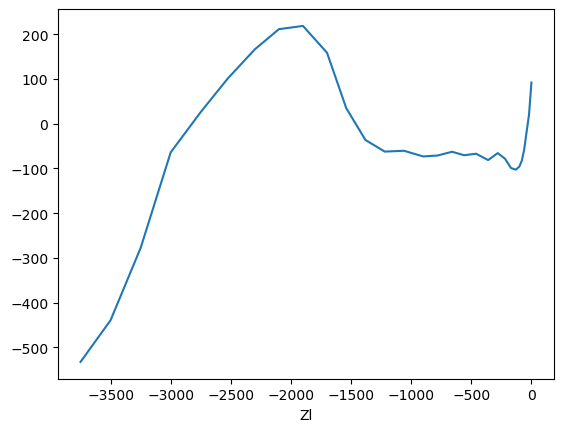

In [18]:
deltaage_flux=(ageneg_fluxmean-agepos_fluxmean)
deltaage_area=(ageneg_areamean-agepos_areamean)
((deltaage_flux-deltaage_area)/deltaage_flux*100).plot()

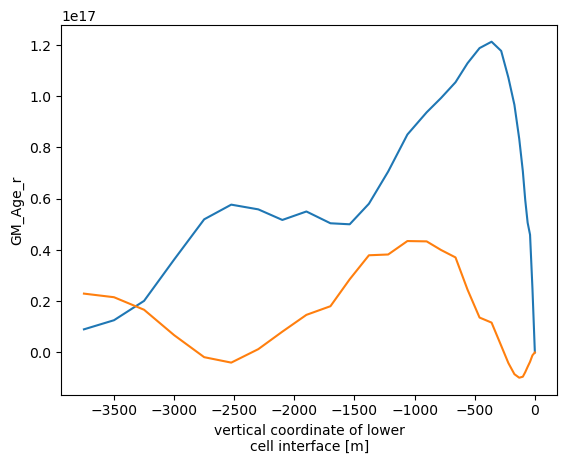

In [343]:
ADVrage=dsGM2x.ADVrTr01.mean('time').sum('XC').sum('YC')
GMrage=dsGM2x.GM_Age_r.mean('time').sum('XC').sum('YC')
DFrEage=dsGM2x.DFrETr01.mean('time').sum('XC').sum('YC')
DFrIage=dsGM2x.DFrITr01.mean('time').sum('XC').sum('YC')
ADVrage.plot()
GMrage.plot()

In [344]:
testarray=dsGM2x.ADVrTr01.mean('time')
testarray[[1,2],[1,2],[1,2,-1]]

<xarray.DataArray 'ADVrTr01' (Zl: 2, YC: 2, XC: 3)>
dask.array<getitem, shape=(2, 2, 3), dtype=float32, chunksize=(2, 2, 3), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) >f4 1.5 2.5 59.5
  * YC       (YC) >f4 -70.5 -69.5
  * Zl       (Zl) >f4 -20.0 -40.0
    rA       (YC, XC) >f4 dask.array<chunksize=(2, 3), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(2, 3), meta=np.ndarray>

[29,
 35.1475019431067,
 36.5241586336697,
 37.0225096344218,
 37.1834441418816,
 37.2349249974977,
 37.2543862039861,
 37.2659033167649,
 37.2736936223893,
 37.2798996483998,
 37.2897972609441,
 37.3001926198771,
 37.3149206107117,
 37.3309206107117]

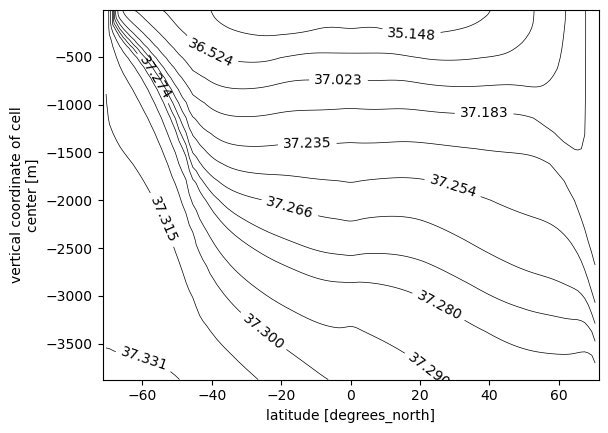

In [1540]:
rhoConst=1035
locPres=dsGM2x.PHrefC*rhoConst
locPres
Stave=dsGM2x.Stave.mean('time')
Ttave=dsGM2x.Ttave.mean('time')
locPres3D=locPres.broadcast_like(Stave)
Stave=Stave.where(Stave!=0)
rho3D=jmd95.densjmd95(Stave,Ttave,locPres3D/10000)
rho3D=jmd95.densjmd95(Stave,Ttave,2000)
rho3D=0*Stave+rho3D
#rhoAnoma=dsGM2x.RHOAnoma.mean('time')+0*Stave

layers1_bounds=[
29,
32,
34,
35.1475019431067,
35.7606867402774,
36.1967377768488,
36.5241586336697,
36.7535664519388,
36.9136106471677,
37.0225096344218,
37.0963264098645,
37.1468671450582,
37.1834441418816,
37.2068170992221,
37.2227259810384,
37.2349249974977,
37.2425252313368,
37.2490123001663,
37.2543862039861,
37.2586586838667,
37.2627128227654,
37.2659033167649,
37.2690102073597,
37.2713646673121,
37.2736936223893,
37.2757930335893,
37.2778924447893,
37.2798996483998,
37.2819044877131,
37.2838965074870,
37.2858836646769,
37.2878550801339,
37.2897972609441,
37.2917394417543,
37.2935546684733,
37.2953474915292,
37.2970608808460,
37.2986267503616,
37.3001926198771,
37.3015729834645,
37.3029206107117,
37.3049206107117,
37.3069206107117,
37.3089206107117,
37.3109206107117,
37.3129206107117,
37.3149206107117,
37.3169206107117,
37.3189206107117,
37.3209206107117,
37.3229206107117,
37.3249206107117,
37.3269206107117,
37.3289206107117,
37.3309206107117,
37.3329206107117,
37.3409206107117,
37.3509206107117,
37.3609206107117,
37.3659206107117,
]

layers1_bounds0=[
29,
32,
34,
35.1475019431067,
35.7606867402774,
36.1967377768488,
36.5241586336697,
36.7535664519388,
36.9136106471677,
37.0225096344218,
37.0963264098645,
37.1468671450582,
37.1834441418816,
37.2068170992221,
37.2227259810384,
37.2349249974977,
37.2425252313368,
37.2490123001663,
37.2543862039861,
37.2586586838667,
37.2627128227654,
37.2659033167649,
37.2690102073597,
37.2713646673121,
37.2736936223893,
37.2757930335893,
37.2778924447893,
37.2798996483998,
37.2819044877131,
37.2838965074870,
37.2858836646769,
37.2878550801339,
37.2897972609441,
37.2917394417543,
37.2935546684733,
37.2953474915292,
37.2970608808460,
37.2986267503616,
37.3001926198771,
37.3015729834645,
37.3029206107117,
37.3049206107117,
37.3069206107117,
37.3089206107117,
37.3109206107117,
37.3129206107117,
37.3149206107117,
37.3169206107117,
37.3189206107117,
37.3209206107117,
37.3229206107117,
37.3249206107117,
37.3269206107117,
37.3289206107117,
37.3309206107117,
37.3329206107117,
37.3409206107117,
37.3509206107117,
37.3609206107117,
37.3659206107117,
]

#layers1_bounds=dsGM2xADVForm.layer_1RHO_bounds.load().data
#layers1_bounds=[29,33]+layers1_bounds[3:25:2]+layers1_bounds[27:35:3]+layers1_bounds[38::4]
layers1_bounds=layers1_bounds[:25:3]+layers1_bounds[27:35:5]+layers1_bounds[38::8]
#layers1_bounds=np.linspace(20,46,30)-35
CS=(rho3D-1000).mean('XC').plot.contour(levels=layers1_bounds,linewidths=0.5, colors='k')
#CS2=rhoAnoma.mean('XC').plot.contour(levels=layers1_bounds,linewidths=0.1, colors='b')
plt.clabel(CS, inline=True, fontsize=10)
#plt.clabel(CS2, inline=True, fontsize=5)
layers1_bounds

In [1341]:
agetmean=dsGM2x.PTRtave01.mean('time').where(dsGM2x.maskC)
agezgrad=grid.diff(agetmean,'Z',boundary='fill')
agexgrad=grid.diff(agetmean,'X')
ageygrad=grid.diff(agetmean,'Y',boundary='fill')
drCl=grid.diff(dsGM2x.Z,'Z',boundary='fill')
agezgrad=agezgrad/drCl

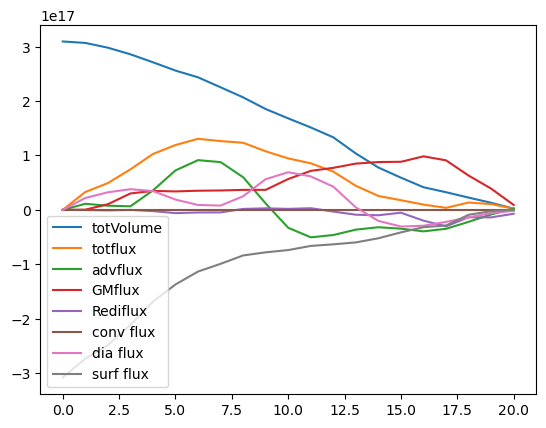

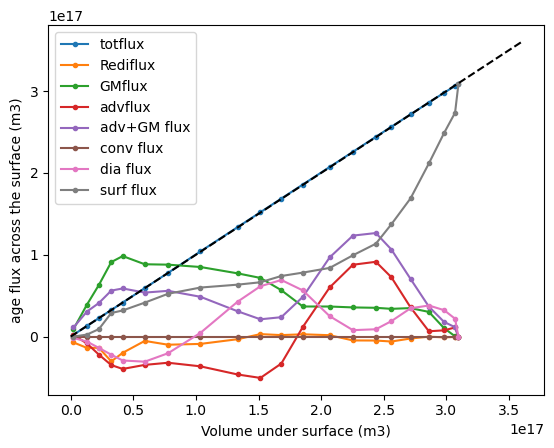

In [1541]:
#divADV=
#divRedi=
#divGM=
#divkiso=
#divkdia=
diffKrBL79surf=2e-5;
diffKrBL79deep= 1e-4;
diffKrBL79Ho  = -2000;
diffKrBL79scl = 150;
Z3d=0*dsGM2x.wVeltave.mean('time')+dsGM2x.Zl
kdia3d=diffKrBL79surf+(diffKrBL79deep-diffKrBL79surf)*(np.arctan(-(Z3d-diffKrBL79Ho)/diffKrBL79scl)/np.pi+0.5 );
kappa=dsGM2x.Tdiftave.mean('time') #kappa=kdia+GM_kwz+kconv
GM_Kwz=dsGM2x['GM_Kwz-T'].mean('time')
#fractions of different fluxes
frac_dia=kdia3d/kappa
frac_GM_Kwz=GM_Kwz/kappa
frac_conv=1-frac_dia-frac_GM_Kwz
#

fadvx=dsGM2x.ADVxTr01.mean('time')
fdiffx=dsGM2x.DFxETr01.mean('time') #GM-Redi x age flux
fadvy=dsGM2x.ADVyTr01.mean('time')
fdiffy=dsGM2x.DFyETr01.mean('time') #GM-Redi y age flux
fadvr=dsGM2x.ADVrTr01.mean('time')
fdiffrE=dsGM2x.DFrETr01.mean('time') #GM-Redi z age flux: contribution of Kwx and Kwy
fdiffrI=dsGM2x.DFrITr01.mean('time') #contribution of kdia+GM_Kwz+kconv

#GM age flux
fGMx=2*dsGM2x.GM_Age_x.mean('time')
fGMy=2*dsGM2x.GM_Age_y.mean('time')
fGMr=2*dsGM2x.GM_Age_r.mean('time') #only contribution of Kwx and Kwy, but this is already total GMr flux since Kwz_GM=0
#Redi age flux
fRedix=fdiffx-fGMx
#fRedix=0*dsGM2x.Redi_ax.mean('time')
fRediy=fdiffy-fGMy
#fRediy=0*dsGM2x.Redi_ay.mean('time')
fRedirE=fdiffrE-fGMr#
#fRedirE=-0*dsGM2x.Redi_ar.mean('time')#only contribution of Kwx and Kwy


#separating implicit diffusion: kdia+GM_Kwz+kconv
fRedirI=fdiffrI*frac_GM_Kwz #only Redi diffusion has contribution in GM-Redi tensor GM_Kwz (no GM contribution)
fdia=fdiffrI*frac_dia
fconv=fdiffrI*frac_conv

#Redi r term
fRedir=fRedirE+fRedirI


ftotx=fadvx+fdiffx
ftoty=fadvy+fdiffy
ftotr=fadvr+fdiffrE+fdiffrI

fsurf=dsGM2x.ForcTr01.mean('time')*dsGM2x.rA*dsGM2x.drF
fsurf[1:,:,:]=0

Vol=dsGM2x.rA*dsGM2x.drF

##divtot diag
#divtotx_diag=dsGM2x.UDIAG1.mean('time')*Vol
#divtoty_diag=dsGM2x.UDIAG2.mean('time')*Vol
#divtotr_diag=dsGM2x.UDIAG3.mean('time')*Vol
#divtot_diag=divtotx_diag+divtoty_diag+divtotr_diag

def divflux(fx,fy,fr,grid=grid):
    '''
    return divergence of a certain flux
    '''
    divfx=grid.diff(fx,axis='X',boundary='periodic')
    divfy=grid.diff(fy,axis='Y',boundary='periodic')
    divfr=-grid.diff(fr,axis='Z',boundary='periodic')
    return divfx,divfy,divfr,divfx+divfy+divfr
#divtot
#divtotx=grid.diff(ftotx,axis='X',boundary='periodic')
#divtoty=grid.diff(ftoty,axis='Y',boundary='fill')
#divtotr=-grid.diff(ftotr,axis='Z',boundary='fill')
#divtot=divtotx+divtoty+divtotr
divtotx,divtoty,divtotr,divtot=divflux(ftotx,ftoty,ftotr)


#div ADV flux: be careful on boundary condition, especially for diffusive fluxes
#divadvx=grid.diff(fadvx,axis='X',boundary='periodic')
#divadvy=grid.diff(fadvy,axis='Y',boundary='fill')
#divadvr=-grid.diff(ftotr,axis='Z',boundary='fill')
#divadv=divadvx+divadvy+divadvr
divadvx,divadvy,divadvr,divadv=divflux(fadvx,fadvy,fadvr)

#div GM flux
divGMx,divGMy,divGMr,divGM=divflux(fGMx,fGMy,fGMr)

#div Redi flux
divRedix,divRediy,divRedir,divRedi=divflux(fRedix,fRediy,fRedir)

#div dia flux
divdia=-grid.diff(fdia,axis='Z',boundary='periodic')
#div conv flux
divconv=-grid.diff(fconv,axis='Z',boundary='periodic')


Voldata=Vol.transpose('Z','YC','XC').load().data
def rhoInt(Xdata,rhoindex=rhoindex,Nlayersbin=Nlayersbin):
    ''''''
    'Integrate Xdata at density layers'
    ''''''
    dX_rho=np.zeros([Nlayersbin-1,1])
    for idx in range(Nx):
        for idy in range(Ny):
            for idz in range(Nz): 
                rhoindextemp=rhoindex[idz,idy,idx]
                if(~np.isnan(rhoindextemp)):  
                    dX_rho[int(rhoindextemp)]+=Xdata[idz,idy,idx]

    #sumVol_rho=np.cumsum(dVol_rho[::-1])[::-1] 
    return np.cumsum(dX_rho[::-1])[::-1]


sumVol_rho=rhoInt(Voldata)
#sumdivtoty_rho=rhoInt(divtoty.load().data)
#sumdivtotx_rho=rhoInt(divtotx.load().data)
#sumdivtotr_rho=rhoInt(divtotr.load().data)
#sumdivtot_rho=sumdivtotx_rho+sumdivtoty_rho+sumdivtotr_rho
sumdivtot_rho=rhoInt(divtot.load().data)
#sumdivtotydiag_rho=rhoInt(divtoty_diag.load().data)
sumdivadv_rho=rhoInt(divadv.load().data)
sumdivGM_rho=rhoInt(divGM.load().data)
sumdivRedi_rho=rhoInt(divRedi.load().data)
sumdivconv_rho=rhoInt(divconv.load().data)
sumdivdia_rho=rhoInt(divdia.load().data)
sumfsurf_rho=rhoInt(fsurf.load().data)

plt.figure()
plt.plot(sumVol_rho,label='totVolume')
plt.plot(sumdivtot_rho,label='totflux')
plt.plot(sumdivadv_rho,label='advflux')
plt.plot(sumdivGM_rho,label='GMflux')
plt.plot(sumdivRedi_rho,label='Rediflux')
plt.plot(sumdivconv_rho,label='conv flux')
plt.plot(sumdivdia_rho,label='dia flux')
plt.plot(sumfsurf_rho,label='surf flux')
plt.legend()
#plt.plot(-sumdivtotydiag_rho)
#plt.plot(sumdivtoty_rho+sumdivtotx_rho+sumdivtotr_rho-sumfsurf_rho)

#plt.plot(-sumdivtot1_rho-sumfsurf_rho)
plt.figure()
plt.plot(sumVol_rho,sumdivtot_rho-sumfsurf_rho,'.-',label='totflux')
plt.plot(sumVol_rho,sumdivRedi_rho,'.-',label='Rediflux')
plt.plot(sumVol_rho,sumdivGM_rho,'.-',label='GMflux')
plt.plot(sumVol_rho,sumdivadv_rho,'.-',label='advflux')
plt.plot(sumVol_rho,sumdivGM_rho+sumdivadv_rho,'.-',label='adv+GM flux')
plt.plot(sumVol_rho,sumdivconv_rho,'.-',label='conv flux')
plt.plot(sumVol_rho,sumdivdia_rho,'.-',label='dia flux')
plt.plot(sumVol_rho,-sumfsurf_rho,'.-',label='surf flux')
plt.plot([0,3.6e17],[0,3.6e17],'k--')

plt.xlabel('Volume under surface (m3)')
plt.ylabel('age flux across the surface (m3)')
plt.legend()




In [1542]:
'''
def findrhoindexgrid(rhoz,layers1_bounds):
    #print(rhoz)
    Nlayersbin=len(layers1_bounds)
    #print(Nlayersbin)
    rhoindexz=np.nan*rhoz
    #rhoindexz=rhoindexz.data
    #rhoz=rhoz.data
    #print(rhoindexz)
    
    rhotemp=rhoz-1000
    #print(rhotemp.load
    if np.isnan(rhotemp):
        return np.nan
    #rhoid_currentgrid=0
    for idrho in range(Nlayersbin):
        rhoid_currentgrid=idrho-1 # grid idrho-1 between boundary [idrho-1, idrho]
        if rhotemp<layers1_bounds[idrho]:
            
            break
    #print(rhoid_currentgrid)
    return rhoid_currentgrid

print(findrhoindexgrid(rho3D[2,2,2],layers1_bounds))
layers1_bounds_xr=xr.DataArray(layers1_bounds,dims=("layers1_bounds"))
start = time.time()
rhoindexxr=xr.apply_ufunc(
    findrhoindexgrid,
    #rho3D[2,2,2],
    rho3D,
    layers1_bounds_xr,
    vectorize=True,
    input_core_dims=[[],["layers1_bounds"]],
    #output_dtypes=[float],
)
end = time.time()
print(end - start)
rhoindexxr=rhoindexxr.rename('rhoindex3d')
'''
1

1

In [1543]:
'''
rhoindex=0*rho3D.load()
rho3Ddata=rho3D.load()
[Nz,Ny,Nx]=rhoindex.shape



for idx in range(Nx):
    start = time.time()
    for idy in range(Ny):     
        for idz in range(Nz):
            rhotemp=rho3Ddata[idz,idy,idx].load()-1000
            #print(rhotemp)
            if np.isnan(rhotemp):
                rhoindex[idz,idy,idx]=np.nan
                continue
            #rhoid_currentgrid=0
            for idrho in range(Nlayersbin):
                rhoid_currentgrid=idrho-1 # grid idrho-1 between boundary [idrho-1, idrho]
                
                if rhotemp<layers1_bounds[idrho]:
                    break
            #print(rhoid_currentgrid)
            rhoindex[idz,idy,idx]=rhoid_currentgrid
    end=time.time()
    print(end - start)
rhoindex
'''
1

1

In [1596]:
np.nanmax(rho3Ddata-1000)

37.35652334518272

In [1544]:
#start = time.time()
Nlayersbin=len(layers1_bounds)
rhoindex=0*rho3D.load().data
rho3Ddata=rho3D.load().data
[Nz,Ny,Nx]=rhoindex.shape
'''
layers1_bounds: boundary of layers, index 1:N (or 0:N-1 in python)
rhoindex:index for rho at the center of layers1_bounds index 1:N-1 (or 0:N-2 in python)
'''
for idx in range(Nx):
    for idy in range(Ny):     
        for idz in range(Nz):
            rhotemp=rho3Ddata[idz,idy,idx]-1000
            #print(rhotemp.load())
            if np.isnan(rhotemp):
                rhoindex[idz,idy,idx]=np.nan
                continue
            #rhoid_currentgrid=0
            for idrho in range(1,Nlayersbin):
                rhoid_currentgrid=idrho-1 # grid idrho-1 between boundary [idrho-1, idrho]
                
                if rhotemp<layers1_bounds[idrho]:
                    break
            #print(rhoid_currentgrid)
            rhoindex[idz,idy,idx]=rhoid_currentgrid
#end = time.time()
#print(end - start)     
#diaFluxOnRho (fx:3D,fy:3D,fz:3D,rhoindex:3D,rhoidcur:int)->2D flux field on rhoidcur
rhoindex0=rhoindex
[nz,ny,nx]=rhoindex0.shape
rhoindext=rhoindex0[np.r_[0,0:nz-1],:,:]
rhoindexs=rhoindex0[:,np.r_[0,0:ny-1],:]
rhoindexn=rhoindex0[:,np.r_[1:ny,ny-1],:]
rhoindexw=rhoindex0[:,:,np.r_[nx-1,0:nx-1]]
rhoindexe=rhoindex0[:,:,np.r_[1:nx,0]]
rhoindexe
def diaFluxOnRho(fx,fy,fz,rhoindex0,rhoidcur):
  
    MSK_rhot=np.logical_and(rhoindex0>=rhoidcur,rhoindext<rhoidcur)
    MSK_rhow=np.logical_and(rhoindex0>=rhoidcur,rhoindexw<rhoidcur)
    MSK_rhoe=np.logical_and(rhoindex0>=rhoidcur,rhoindexe<rhoidcur)
    MSK_rhos=np.logical_and(rhoindex0>=rhoidcur,rhoindexs<rhoidcur)
    MSK_rhon=np.logical_and(rhoindex0>=rhoidcur,rhoindexn<rhoidcur)
    fxw=fx
    fxe=fx[:,:,np.r_[1:nx,0]]
    fys=fy
    fyn=fy[:,np.r_[1:ny,ny-1],:]
    fluxgrid=(-fxw)*(MSK_rhow)+fxe*(MSK_rhoe)+fyn*(MSK_rhon)+(-fys)*(MSK_rhos)+fz*MSK_rhot
    diafluxrho=np.sum(fluxgrid,axis=0)
    return diafluxrho

diafluxrho=diaFluxOnRho(fx=ftotx.load().data,fy=ftoty.load().data,fz=ftotr.load().data,rhoindex0=rhoindex0,rhoidcur=0)

diafluxrho3D=np.zeros([Nlayersbin-1,ny,nx])
for layerid in range(Nlayersbin-1):
    diafluxrho3D[layerid,:,:]=diaFluxOnRho(fx=ftotx.load().data,fy=ftoty.load().data,fz=ftotr.load().data,rhoindex0=rhoindex0,rhoidcur=layerid)
diaFluxOnRho_3D=np.vectorize(
    diaFluxOnRho,
    excluded=['fx','fy','fz','rhoindex0'],
    signature='()->(m,n)'
)



In [1545]:
dsGM2xADVForm

<xarray.Dataset>
Dimensions:               (time: 1, XC: 60, YC: 144, XG: 60, YG: 144, Z: 30,
                           Zp1: 31, Zu: 30, Zl: 30, layer_1RHO_bounds: 435,
                           layer_1RHO_center: 434, layer_1RHO_interface: 433)
Coordinates: (12/33)
    iter                  (time) int64 134308848
  * time                  (time) timedelta64[ns] 1554 days 12:00:48
  * XC                    (XC) >f4 0.5 1.5 2.5 3.5 4.5 ... 56.5 57.5 58.5 59.5
  * YC                    (YC) >f4 -71.5 -70.5 -69.5 -68.5 ... 69.5 70.5 71.5
  * XG                    (XG) >f4 0.0 1.0 2.0 3.0 4.0 ... 56.0 57.0 58.0 59.0
  * YG                    (YG) >f4 -72.0 -71.0 -70.0 -69.0 ... 69.0 70.0 71.0
    ...                    ...
    maskW                 (Z, YC, XG) bool False False False ... False False
    maskS                 (Z, YG, XC) bool False False False ... False False
    rhoRef                (Z) >f4 1.028e+03 1.028e+03 ... 1.044e+03 1.045e+03
  * layer_1RHO_bounds     (layer_1RHO_bounds) >f4 1.0 10.0 20.0 ... 37.99 38.0
  * layer_1RHO_center     (layer_1RHO_center) float32 5.5 15.0 ... 37.99 38.0
  * layer_1RHO_interface  (layer_1RHO_interface) >f4 10.0 20.0 ... 37.98 37.99
Data variables: (12/33)
    uVeltave              (time, Z, YC, XG) >f4 dask.array<chunksize=(1, 30, 144, 60), meta=np.ndarray>
    GM_Age_x              (time, Z, YC, XG) >f4 dask.array<chunksize=(1, 30, 144, 60), meta=np.ndarray>
    GM_Age_y              (time, Z, YG, XC) >f4 dask.array<chunksize=(1, 30, 144, 60), meta=np.ndarray>
    GM_Age_r              (time, Zl, YC, XC) >f4 dask.array<chunksize=(1, 30, 144, 60), meta=np.ndarray>
    Tdiftave              (time, Zl, YC, XC) >f4 dask.array<chunksize=(1, 30, 144, 60), meta=np.ndarray>
    ADVrTr01              (time, Zl, YC, XC) >f4 dask.array<chunksize=(1, 30, 144, 60), meta=np.ndarray>
    ...                    ...
    GM_Kwz-T              (time, Zl, YC, XC) >f4 dask.array<chunksize=(1, 30, 144, 60), meta=np.ndarray>
    wVeltave              (time, Zl, YC, XC) >f4 dask.array<chunksize=(1, 30, 144, 60), meta=np.ndarray>
    vVeltave              (time, Z, YG, XC) >f4 dask.array<chunksize=(1, 30, 144, 60), meta=np.ndarray>
    GM_PsiX               (time, Zl, YC, XG) >f4 dask.array<chunksize=(1, 30, 144, 60), meta=np.ndarray>
    LaUH1RHO              (time, layer_1RHO_center, YC, XG) >f4 0.0 0.0 ... 0.0
    Ttave                 (time, Z, YC, XC) >f4 dask.array<chunksize=(1, 30, 144, 60), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir=None, iters=[1...

In [1546]:
maskGMPsiX=grid.interp(grid.interp(dsGM2x.maskC.where(dsGM2x.maskC),'Z'),'X')
maskGMPsiX[0,:,:]=np.nan
maskGMPsiX=maskGMPsiX.fillna(0)
maskGMPsiY=grid.interp(grid.interp(dsGM2x.maskC.where(dsGM2x.maskC),'Z'),'Y')
maskGMPsiY[0,:,:]=np.nan
maskGMPsiY=maskGMPsiY.fillna(0)
maskr=grid.interp(dsGM2x.maskC.astype('double'),'Z')
maskc=dsGM2x.maskC
maskr=maskr.where(maskr>0.5)
maskr=maskr.fillna(0)
PsixGM_Tensor=grid.interp(GM_Kwx_gm*dsGM2x.rA,'X')/dsGM2x.rAw
PsixGM_Tensor=PsixGM_Tensor.where(maskGMPsiX)
PsixGM_Tensor=PsixGM_Tensor.fillna(0)
delPsixGM_Tensor=grid.diff(PsixGM_Tensor,'Z',boundary='fill')
ugmFromTensor=delPsixGM_Tensor/dsGM2x.drF*dsGM2x.hFacW
PsiyGM_Tensor=grid.interp(GM_Kwy_gm*dsGM2x.rA,'Y')/dsGM2x.rAs
PsiyGM_Tensor=PsiyGM_Tensor.where(maskGMPsiY)
PsiyGM_Tensor=PsiyGM_Tensor.fillna(0)
delPsiyGM_Tensor=grid.diff(PsiyGM_Tensor,'Z',boundary='fill')
vgmFromTensor=delPsiyGM_Tensor/dsGM2x.drF*dsGM2x.hFacS
wgmFromTensor=grid.diff(PsixGM_Tensor*dsGM2x.dyG,'X',boundary='periodic')\
    +grid.diff(PsiyGM_Tensor*dsGM2x.dxG,'Y')
wgmFromTensor=wgmFromTensor/dsGM2x.rA
wgmFromTensor=maskr*wgmFromTensor
age=dsGM2x.PTRtave01
age=age.where(dsGM2x.maskC).mean('time')
#age at Zl
agel=grid.interp(age, 'Z',boundary='fill')
AgerfluxGM=dsGM2x.GM_Age_r.where(dsGM2x.ADVrTr01!=0).mean('time')
wgmFromSkewflux=AgerfluxGM/agel/dsGM2x.rA
wgmAgeFromTensor=agel*wgmFromTensor*dsGM2x.rA
#age at U points(XG)
ageU=grid.interp(age,'X')
AgexfluxGM=dsGM2x.GM_Age_x.where(dsGM2x.ADVxTr01!=0).mean('time')
xA=dsGM2x.dyG*dsGM2x.drF
ugmAgeFromTensor=ageU*ugmFromTensor*xA
ugmFromSkewflux=AgexfluxGM/ageU/xA
#age at V points(YG)
ageV=grid.interp(age,'Y',boundary='fill')
AgeyfluxGM=dsGM2x.GM_Age_y.where(dsGM2x.ADVyTr01!=0).mean('time')
yA=dsGM2x.dxG*dsGM2x.drF
vgmAgeFromTensor=ageV*vgmFromTensor*yA
vgmFromSkewflux=AgeyfluxGM/ageV/yA
GM_PsiX_nobvp=dsGM2xADVForm.GM_PsiX.mean('time')
GM_PsiY_nobvp=dsGM2xADVForm.GM_PsiY.mean('time')
ugm_nobvp=grid.diff(GM_PsiX_nobvp,'Z',boundary='fill')/dsGM2x.drF
vgm_nobvp=grid.diff(GM_PsiY_nobvp,'Z',boundary='fill')/dsGM2x.drF
wgm_nobvp=(grid.diff(GM_PsiX_nobvp*dsGM2x.dyG,'X',boundary='periodic')+grid.diff(GM_PsiY_nobvp*dsGM2x.dxG,'Y'))/dsGM2x.rA
fadvxnobvp=dsGM2xADVForm.ADVxTr01.mean('time')
fadvynobvp=dsGM2xADVForm.ADVyTr01.mean('time')
fadvrnobvp=dsGM2xADVForm.ADVrTr01.mean('time')
fVolx_nobvp=(fadvxnobvp/ageU).fillna(0)
fVoly_nobvp=(fadvynobvp/ageV).fillna(0)
fVolr_nobvp=(fadvrnobvp/agel).fillna(0)

fadvxtmp=fadvx#+fGMx
fadvytmp=fadvy#+fGMy
fadvrtmp=fadvr#+fGMr
'''
fVolx=(fadvxtmp/ageU).fillna(0)
fVoly=(fadvytmp/ageV).fillna(0)
fVolr=(fadvrtmp/agel).fillna(0)


fVolx=ugmFromSkewflux.fillna(0)*xA
fVoly=vgmFromSkewflux.fillna(0)*yA
fVolr=wgmFromSkewflux.fillna(0)*dsGM2x.rA
#fVolx=ugm_nobvp*xA.fillna(0)
#fVoly=vgm_nobvp*yA.fillna(0)
#fVolr=wgm_nobvp*dsGM2x.rA.fillna(0)
'''
fVolEux=dsGM2x.uVeltave.mean('time')*xA
fVolEuy=dsGM2x.vVeltave.mean('time')*yA
fVolEur=dsGM2x.wVeltave.mean('time')*dsGM2x.rA
fVolgmx=ugmFromTensor.fillna(0)*xA.fillna(0)
fVolgmy=vgmFromTensor.fillna(0)*yA.fillna(0)
fVolgmr=wgmFromTensor.fillna(0)*dsGM2x.rA.fillna(0)
#fVolx_nobvp=ugm_nobvp*xA
#fVolgmy=vgm_nobvp*yA
#fVolgmr=wgm_nobvp*dsGM2x.rA
fVolx=fVolEux+fVolgmx
fVoly=fVolEuy+fVolgmy
fVolr=fVolEur+fVolgmr
diaageadvEufluxrho=diaFluxOnRho_3D(fx=fadvxtmp.load().data,fy=fadvytmp.load().data,fz=fadvrtmp.load().data,rhoindex0=rhoindex0,rhoidcur=np.arange(0,Nlayersbin-1))
diaageadvgmfluxrho=diaFluxOnRho_3D(fx=fGMx.load().data,fy=fGMy.load().data,fz=fGMr.load().data,rhoindex0=rhoindex0,rhoidcur=np.arange(0,Nlayersbin-1))
diaageadvfluxrho=diaageadvEufluxrho+diaageadvgmfluxrho
diaageadv_nobvp=diaFluxOnRho_3D(fx=fadvxnobvp.load().data,fy=fadvynobvp.load().data,fz=fadvrnobvp.load().data,rhoindex0=rhoindex0,rhoidcur=np.arange(0,Nlayersbin-1))

diaVoladvEufluxrho=diaFluxOnRho_3D(fx=fVolEux.load().data,fy=fVolEuy.load().data,fz=fVolEur.load().data,rhoindex0=rhoindex0,rhoidcur=np.arange(0,Nlayersbin-1))
diaVoladvgmfluxrho=diaFluxOnRho_3D(fx=fVolgmx.load().data,fy=fVolgmy.load().data,fz=fVolgmr.load().data,rhoindex0=rhoindex0,rhoidcur=np.arange(0,Nlayersbin-1))
diaVoladvfluxrho=diaFluxOnRho_3D(fx=fVolx.load().data,fy=fVoly.load().data,fz=fVolr.load().data,rhoindex0=rhoindex0,rhoidcur=np.arange(0,Nlayersbin-1))
diaVoladvfluxrho=diaVoladvEufluxrho+diaVoladvgmfluxrho
diaVoladvnobvp=diaFluxOnRho_3D(fx=fVolx_nobvp.load().data,fy=fVoly_nobvp.load().data,fz=fVolr_nobvp.load().data,rhoindex0=rhoindex0,rhoidcur=np.arange(0,Nlayersbin-1))

diaagerho=diaageadvfluxrho/(diaVoladvfluxrho+1e-10)
diaVoladvfluxrho_hsum=np.sum(np.sum(diaVoladvfluxrho,axis=2),axis=1)
diaagerho_nobvp=diaageadv_nobvp/(diaVoladvnobvp+1e-10)


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Text(0.5, 0.98, 'Redi diapycnal age flux')

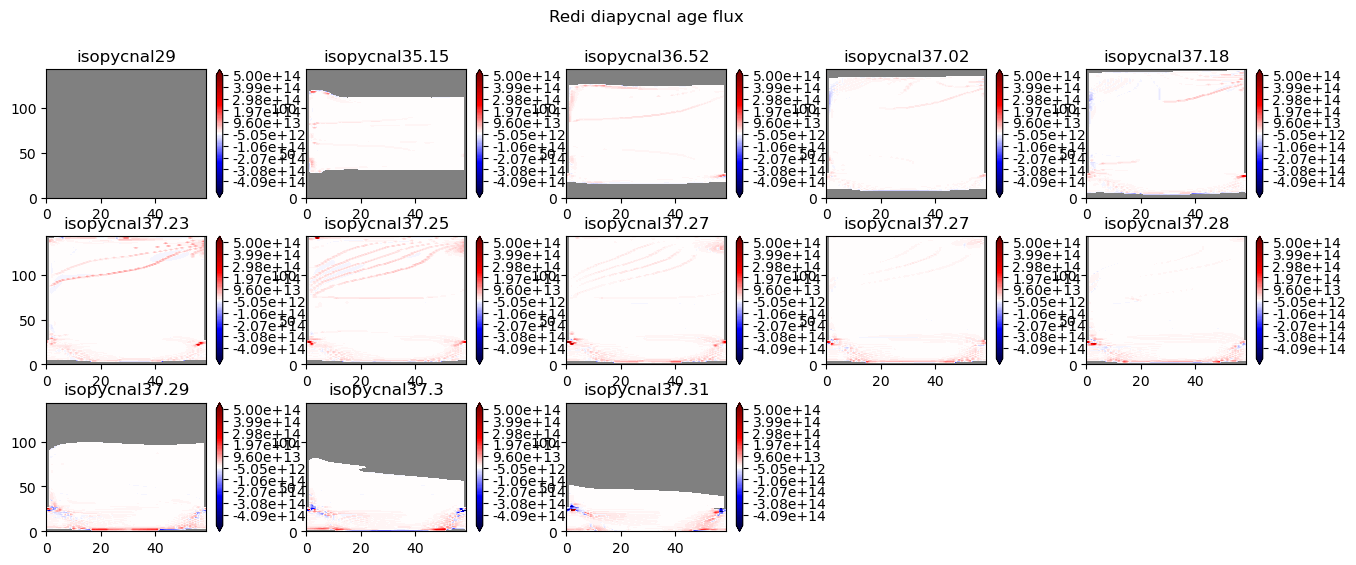

In [1547]:
diaRedi=diaFluxOnRho_3D(fx=fRedix.load().data,fy=fRediy.load().data,fz=fRedir.load().data,rhoindex0=rhoindex0,rhoidcur=np.arange(0,Nlayersbin-1))
diaVoladvEufluxrhotemp=diaRedi.copy()
diaVoladvEufluxrhotemp[diaVoladvEufluxrhotemp==0]=np.nan
fig = plt.figure(figsize=(16,6))
for i in range(0,Nlayersbin-1):
    plt.subplot(3,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    im=plt.contourf(diaVoladvEufluxrhotemp[i,:,:],levels=np.linspace(-0.5e15,0.5e15,100),cmap='seismic',extend='both')
    plt.colorbar(format="%.2e")
    plt.title(f"isopycnal{layers1_bounds[i]:.4g}")
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey") 
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle('Redi diapycnal age flux')

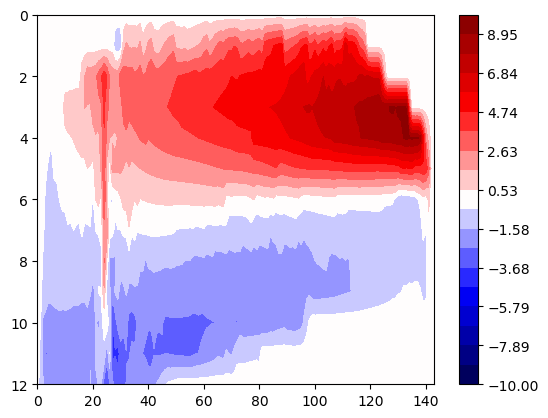

In [1548]:
diastreamfunction=np.sum(diaVoladvfluxrho,axis=2)
diastreamfunction=np.cumsum(diastreamfunction,axis=1)
plt.contourf(diastreamfunction/1e6,levels=np.linspace(-10,10,20),vmin=-10,vmax=10,cmap='seismic')
plt.colorbar()
plt.gca().invert_yaxis()

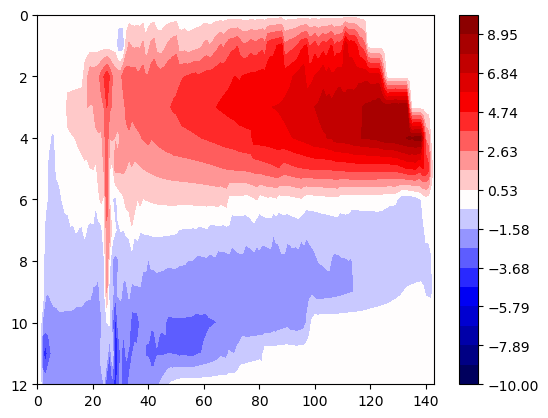

In [1549]:
#calculating streamfunction from velocity
#fVoly_nobvp_np=fVoly_nobvp.load().data
#fVoly_nobvp_np=fVolEuy.load().data
fVoly_nobvp_np=(fVolEuy+vgm_nobvp*yA).load().data
#nz=Nlayersbin-1
[nz,ny,nx]=fVolx_nobvp.shape
PsiX_tot_rho=np.zeros([Nlayersbin-1,ny])
for ix in range(nx):
    for iy in range(ny):
        for iz in range(nz):
            rhoidtemp=rhoindex[iz,iy,ix]
            if(np.isnan(rhoidtemp)):
                continue
            #print(rhoidtemp)
            PsiX_tot_rho[int(rhoidtemp),iy]+=fVoly_nobvp_np[iz,iy,ix]
PsiX_tot_rho=np.cumsum(PsiX_tot_rho[::-1,:],axis=0)[::-1,:]
#PsiX_tot_rho=-np.cumsum(PsiX_tot_rho,axis=0)
yy=dsGM2x.YG
zz=layers1_bounds[:-1]
plt.contourf(-PsiX_tot_rho/1e6,levels=np.linspace(-10,10,20),vmin=-10,vmax=10,cmap='seismic')
plt.colorbar()
plt.gca().invert_yaxis()

In [1550]:
dsGM2x.drF

<xarray.DataArray 'drF' (Z: 30)>
array([ 20.,  20.,  20.,  20.,  20.,  30.,  40.,  50.,  60.,  80., 100.,
       100., 100., 120., 120., 160., 160., 160., 160., 160., 200., 200.,
       200., 225., 225., 250., 250., 250., 250., 250.], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -10.0 -30.0 -50.0 ... -3.375e+03 -3.625e+03 -3.875e+03
    drF      (Z) >f4 20.0 20.0 20.0 20.0 20.0 ... 250.0 250.0 250.0 250.0 250.0
    PHrefC   (Z) >f4 98.1 294.3 490.5 686.7 ... 3.311e+04 3.556e+04 3.801e+04
    rhoRef   (Z) >f4 1.028e+03 1.028e+03 1.028e+03 ... 1.044e+03 1.045e+03
Attributes:
    standard_name:  cell_z_size
    long_name:      cell z size
    units:          m

In [1552]:
rhotest=rhoatV[:,10:11,0:1].fillna(0)*0
rhotest[:,0,0]=np.arange(30)
rhotest
dsGM2x.drF
dsGM2x.drC

<xarray.DataArray 'drC' (Zp1: 31)>
array([ 10. ,  20. ,  20. ,  20. ,  20. ,  25. ,  35. ,  45. ,  55. ,
        70. ,  90. , 100. , 100. , 110. , 120. , 140. , 160. , 160. ,
       160. , 160. , 180. , 200. , 200. , 212.5, 225. , 237.5, 250. ,
       250. , 250. , 250. , 125. ], dtype=float32)
Coordinates:
  * Zp1      (Zp1) >f4 0.0 -20.0 -40.0 -60.0 ... -3.5e+03 -3.75e+03 -4e+03
    drC      (Zp1) >f4 10.0 20.0 20.0 20.0 20.0 ... 250.0 250.0 250.0 125.0
    PHrefF   (Zp1) >f4 0.0 196.2 392.4 588.6 ... 3.434e+04 3.679e+04 3.924e+04
Attributes:
    standard_name:  cell_z_size_at_w_location
    long_name:      cell z size
    units:          m

In [1553]:
#layers1_boundsx=layers1_bounds
layers1_boundsx=[0,1,2,3]
print(layers1_boundsx)
fVol_ones=xr.ones_like(fVolEuy[:,10:11,0:1])
#fVol_ones[1,0,0]=np.nan
#mydrF=dsGM2x
#fvol_interp=layers_apply(fVolEuy[:,10:11,0:1] ,(rhoatV[:,10:11,0:1].fillna(1000)-1000), np.array(layers1_boundsx), dsGM2x.drF, dsGM2x.drC, 10, 'Z', 'mylayer_1RHO_bounds')
zeta_interp=layers_apply(fVol_ones ,rhotest, np.array(layers1_boundsx), dsGM2x.drF, dsGM2x.drC, 10, 'Z', 'mylayer_1RHO_bounds')
zeta_interp.load()
len(layers1_boundsx)
idlayer=layers.layers_locate(layers1_boundsx,len(layers1_boundsx),-1)
idlayer


[0, 1, 2, 3]


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  data_out = xr.apply_ufunc(layers_numpy, data_in, theta_in,


1

In [1554]:
(rhoatV[:,10:11,0:1].fillna(1000)-1000).max()

<xarray.DataArray 'Stave' ()>
array(37.32606913)

kgv = Nlayers

      DO kg=1,Nlayers
           VH(kg) = 0. 
      ENDDO
      
        DO kk=1,NZZ
          k = MapIndex(kk)
          kp1=k+1
          Tfact = MapFact(kk)  * tracer(k) +
     &      (1. -MapFact(kk)) * tracer(kp1)
     
         CALL LAYERS_LOCATE(
     I        layers_bounds,Nlayers,msteps,Tfact,kgv)
        kloc = kgv
C       NEED TO ADD TOPOGRAPHY HERE
        kci = CellIndex(kk)
        dzfac = dZZf(kk)
        VH(kloc) =
     &    VH(kloc) +
     &    dzfac   * Vel(kci)
        ENDDO

      END SUBROUTINE
      
DO kk=1,NZZ
                0163        k = MapIndex(kk)
                0164        kci = CellIndex(kk)
d746ff23b0 Jean*0165 #ifdef ALLOW_GMREDI
                0166        kcip1 = MIN(kci+1,Nr)
                0167        maskp1 = 1.
                0168        IF (kci.GE.Nr) maskp1 = 0.
                0169 #endif /* ALLOW_GMREDI */
5b31d86392 Mart*0170 #ifdef LAYERS_UFLUX
      
DO j = 1,sNy+1
                0172         DO i = 1,sNx+1
                0173 
                0174 C ------ Find theta at the U point (west) on the fine Z grid
                0175          kp1=k+1
f6012f0463 Ryan*0176          IF (maskW(i,j,kp1,bi,bj).EQ.zeroRS) kp1=k
                0177          TatU(i,j) = MapFact(kk) *
                0178      &    0.5 _d 0 * (tracer(i-1,j,k,bi,bj)+tracer(i,j,k,bi,bj)) +
                0179      &    (1. _d 0 -MapFact(kk)) *
                0180      &    0.5 _d 0 * (tracer(i-1,j,kp1,bi,bj)+tracer(i,j,kp1,bi,bj))
aa668e01f1 Gael*0181 
5b31d86392 Mart*0182         ENDDO
                0183        ENDDO


In [1555]:
from xlayers import finegrid, layers
from xlayers.core import layers_apply,layers_numpy
drf_finer, mapindex, mapfact, cellindex = finegrid.finegrid(dsGM2x.drF, dsGM2x.drC,[dsGM2x.drF.size,10])


def layer_tinterp(tracer,maskWi ,mapindex, mapfact):
    
    '''
    interpolating tracer to fine z grid
    '''   
    nzz=len(mapindex)
    tinterp=np.zeros(nzz)
    #print(tinterp)
    for kk in range(nzz):
        #print(kk)
        k=mapindex[kk]-1
        kci=mapindex[kk]
        if(maskWi[k+1]==0):
            kp1=k
        else:
            kp1=k+1
        tinterp[kk]=tracer[k]*mapfact[kk]+tracer[kp1]*(1-mapfact[kk])
    return tinterp

        
    
    
def layer_vinterp(vel,):
    '''
    interpolating velocity to fine z grid
    '''
    nzz=len(mapindex)
    tinterp=np.zeros(nzz)
    #print(tinterp)
    for kk in range(nzz):
        #print(kk)
        k=mapindex[kk]-1
        kci=mapindex[kk]
        if(maskWi[k+1]==0):
            kp1=k
        else:
            kp1=k+1
        tinterp[kk]=tracer[k]*mapfact[kk]+tracer[kp1]*(1-mapfact[kk])
    return tinterp

Ntest=30
tinterp=layer_tinterp(np.arange(Ntest),np.ones(Ntest),mapindex,mapfact)
#tinterp

In [1556]:
rhoatV_nonan=rhoatV.copy().load().data
[nz,ny,nx]=rhoatV_nonan.shape
for i in range(nx):
    for j in range(ny):
        rhotemp=0
        for k in range(nz):
            if(np.isnan(rhoatV_nonan[k,j,i])):
                rhoatV_nonan[k,j,i]=rhotemp
            else:
                rhotemp=rhoatV_nonan[k,j,i]
                
rhoatV_nonan=rhoatV.fillna(0)*0+rhoatV_nonan
rhoatV_nonan.load()        

<xarray.DataArray 'Stave' (Z: 30, YG: 144, XC: 60)>
array([[[   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [1037.31915521, 1037.31903261, 1037.31887294, ...,
         1037.31675327, 1037.31870625, 1037.3191158 ],
        ...,
        [   0.        , 1037.24711795, 1037.24406776, ...,
         1037.17020307, 1037.16697852,    0.        ],
        [   0.        , 1037.24908243, 1037.24707647, ...,
         1037.18491249, 1037.18235038,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ]],

       [[   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [1037.3191552 , 1037.3190326 , 1037.31887294, ...,
         1037.31675327, 1037.31870624, 1037.31911579],
...
        [   0.        , 1037.27536146, 1037.27549152, ...,
         1037.28330004, 1037.28331726,    0.        ],
        [   0.        , 1037.2742625 , 1037.27434721, ...,
         1037.28334252, 1037.28335637,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ]],

       [[   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [1037.3259353 , 1037.32590418, 1037.32675535, ...,
         1037.32724772, 1037.32600233, 1037.32596884],
        ...,
        [   0.        , 1037.28104869, 1037.28109152, ...,
         1037.28349176, 1037.28349429,    0.        ],
        [   0.        , 1037.28079858, 1037.28083821, ...,
         1037.28348693, 1037.28348857,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ]]])
Coordinates:
  * XC       (XC) >f4 0.5 1.5 2.5 3.5 4.5 5.5 ... 54.5 55.5 56.5 57.5 58.5 59.5
  * YG       (YG) >f4 -72.0 -71.0 -70.0 -69.0 -68.0 ... 67.0 68.0 69.0 70.0 71.0
  * Z        (Z) >f4 -10.0 -30.0 -50.0 ... -3.375e+03 -3.625e+03 -3.875e+03

In [1609]:
#layers1_bounds=layers1_bounds+[37.5]
len(layers1_bounds)


16

/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  data_out = xr.apply_ufunc(layers_numpy, data_in, theta_in,


Text(0.5, 0.98, 'diapycnal (Eul+gm) volume flux from xlayers package')

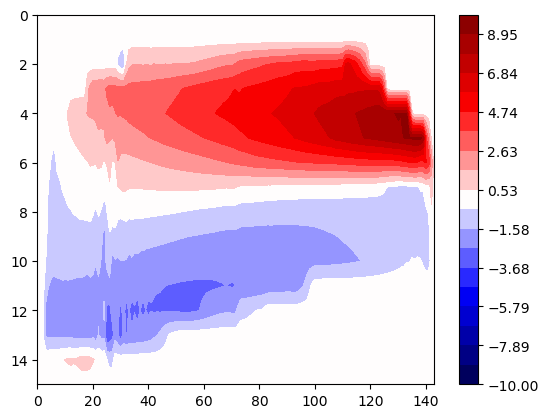

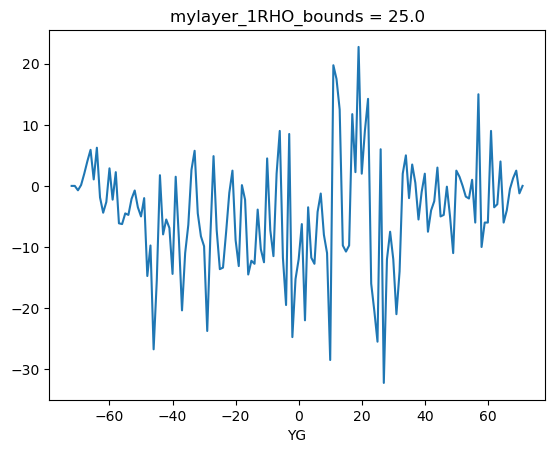

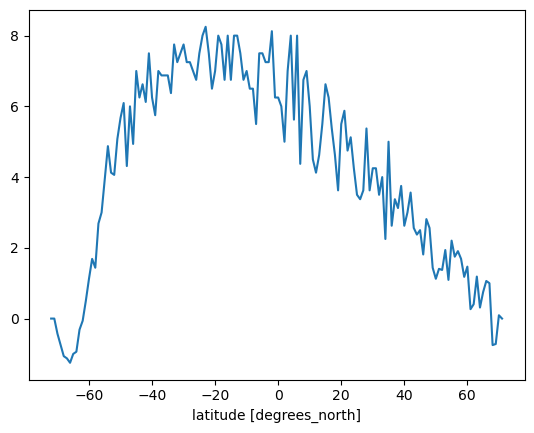

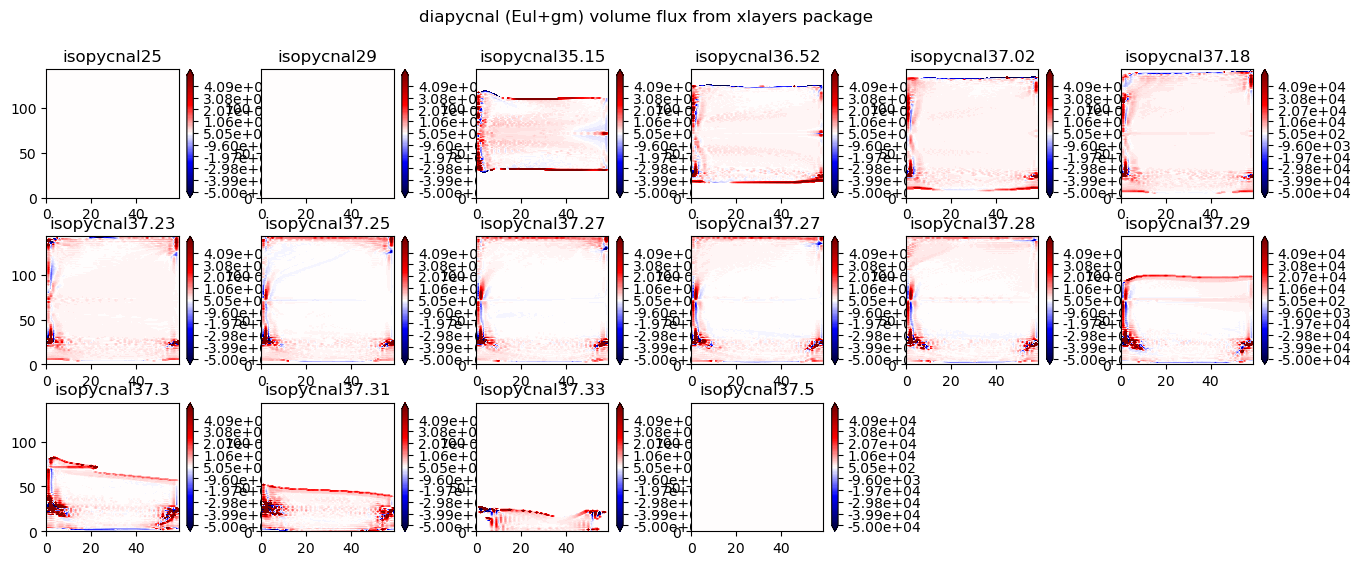

In [1611]:
rhoatV=grid.interp(rho3D,'Y')
rhoatU=grid.interp(rho3D,'X')
tmpfVoly=fVolEuy+fVolgmy
tmpfVolx=fVolEux+fVolgmx
rhoatV_nonan=rhoatV.copy().load().data
rhoatU_nonan=rhoatU.copy().load().data
rho_nonan=rho3D.copy().load().data
[nz,ny,nx]=rhoatV_nonan.shape
for i in range(nx):
    for j in range(ny):
        rhotempV=0
        rhotempU=0
        rhotemp0=0
        for k in range(nz):
            if(np.isnan(rhoatV_nonan[k,j,i])):
                rhoatV_nonan[k,j,i]=rhotempV
            else:
                rhotempV=rhoatV_nonan[k,j,i]
            if(np.isnan(rhoatU_nonan[k,j,i])):
                rhoatU_nonan[k,j,i]=rhotempU
            else:
                rhotempU=rhoatU_nonan[k,j,i]
            if(np.isnan(rho_nonan[k,j,i])):
                rho_nonan[k,j,i]=rhotemp0
            else:
                rhotemp0=rho_nonan[k,j,i]
                
                
rhoatV_nonan=rhoatV.fillna(0)*0+rhoatV_nonan
rhoatU_nonan=rhoatU.fillna(0)*0+rhoatU_nonan
rho_nonan=rho3D.fillna(0)*0+rho_nonan
#layers1_bounds=dsGM2xADVForm.layer_1RHO_bounds.load().data
dPsiY_layers= layers_apply((tmpfVoly)/dsGM2x.drF ,(rhoatV_nonan-1000), np.array(layers1_bounds), dsGM2x.drF, dsGM2x.drC, 10, 'Z', 'mylayer_1RHO_bounds')
dPsiX_layers= layers_apply((tmpfVolx)/dsGM2x.drF ,(rhoatU_nonan-1000), np.array(layers1_bounds), dsGM2x.drF, dsGM2x.drC, 10, 'Z', 'mylayer_1RHO_bounds')
Nlayersbin=len(layers1_bounds)



#zeta_500
#dPsiX_layers= layers_apply(xr.ones_like(fVoly_nobvp.fillna(0)), (rhoatV.fillna(1030)-1000), np.array(layers1_bounds), dsGM2x.drF, dsGM2x.drC, 1, 'Z', 'layer_1RHO_bounds')
#dPsiX_layers_zonalsum=
dPsiX_layers_zonalsum=(dPsiY_layers).sum('XC') #yes it shoul be dPsiY, and the name should be corrected latter
PsiX_layers_zonalsum=-dPsiX_layers_zonalsum[:,::-1].cumsum('mylayer_1RHO_bounds')[:,::-1]
plt.contourf(PsiX_layers_zonalsum.T/1e6,levels=np.linspace(-10,10,20),vmin=-10,vmax=10,cmap='seismic')
#plt.contourf(-PsiX_layers_zonalsum.T/1e6,cmap='seismic')
plt.colorbar()

plt.gca().invert_yaxis()
plt.figure()
#tmpfVol.sum('Z').sum('XC').plot()
PsiX_layers_zonalsum[:,0].plot()
plt.figure()
(tmpfVol.fillna(0)).sum('XC').sum('Z').plot()

PsiX_layers_grid=-dPsiX_layers[:,:,::-1].cumsum('mylayer_1RHO_bounds')[:,:,::-1]
PsiY_layers_grid=-dPsiY_layers[:,:,::-1].cumsum('mylayer_1RHO_bounds')[:,:,::-1]
dia_layers_3D=grid.diff(PsiX_layers_grid,'X',boundary='periodic')+grid.diff(PsiY_layers_grid,'Y')
fig = plt.figure(figsize=(16,6))
for i in range(0,Nlayersbin-1):
    plt.subplot(3,6, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    im=plt.contourf(dia_layers_3D[:,:,i],levels=np.linspace(-0.5e5,0.5e5,100),cmap='seismic',extend='both')
    plt.colorbar(format="%.2e")
    plt.title(f"isopycnal{layers1_bounds[i]:.4g}")
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey") 
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle('diapycnal (Eul+gm) volume flux from xlayers package')


In [1634]:
#layers1_bounds
#layers1_center=[]
#for i in range(len(layers1_bounds)-1):
    #layers1_center.append((layers1_bounds[i]+layers1_bounds[i+1])/2)
#layers1_center=layers1_bounds[0:1]+layers1_center
#len(layers1_bounds)
#age_layers

<xarray.DataArray (YC: 144, XC: 60, mylayer_1RHO_bounds: 16)>
array([[[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan]],

       [[          nan,           nan,           nan, ...,
         3.4972550e+08,           nan,           nan],
        [          nan,           nan,           nan, ...,
         3.6473206e+08,           nan,           nan],
        [          nan,           nan,           nan, ...,
         8.5060518e+08,           nan,           nan],
...
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan]]], dtype=float32)
Coordinates:
  * XC                   (XC) >f4 0.5 1.5 2.5 3.5 4.5 ... 56.5 57.5 58.5 59.5
  * YC                   (YC) >f4 -71.5 -70.5 -69.5 -68.5 ... 69.5 70.5 71.5
    rA                   (YC, XC) >f4 3.922e+09 3.922e+09 ... 3.922e+09
    Depth                (YC, XC) >f4 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * mylayer_1RHO_bounds  (mylayer_1RHO_bounds) float64 25.0 29.0 ... 37.33 37.5

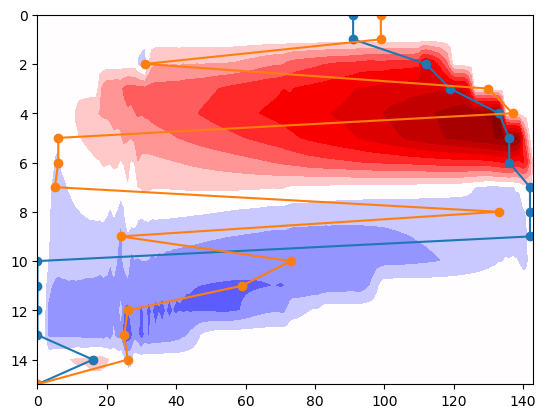

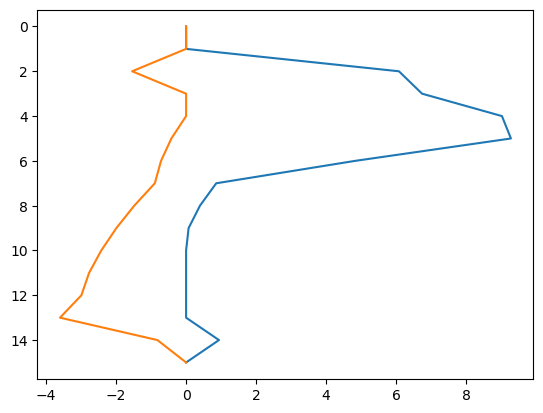

In [1736]:
plt.figure()
plt.contourf(PsiX_layers_zonalsum.T/1e6,levels=np.linspace(-10,10,20),vmin=-10,vmax=10,cmap='seismic')
plt.gca().invert_yaxis()
maxids=PsiX_layers_zonalsum.argmax('YG')
minids=PsiX_layers_zonalsum.argmin('YG')
streamflux_upper=PsiX_layers_zonalsum.max('YG')/1e6
streamflux_lower=PsiX_layers_zonalsum.min('YG')/1e6
plt.plot(maxids,np.arange(Nlayersbin),'o-')
plt.plot(minids,np.arange(Nlayersbin),'o-')


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  data_out = xr.apply_ufunc(layers_numpy, data_in, theta_in,
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/xlayers/core.py:107: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  data_out = xr.apply_ufunc(layers_numpy, data_in, theta_in,


/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Text(0.5, 0.98, 'age interpolated onto isopycnals nobvp')

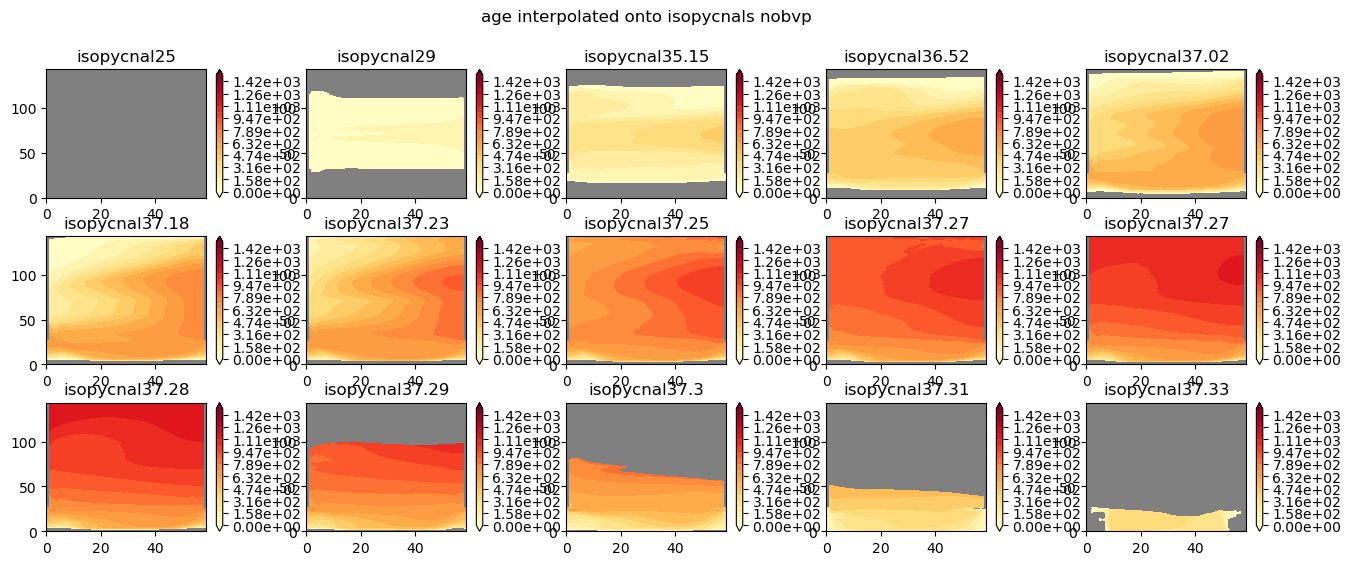

In [1635]:
age=dsGM2x.PTRtave01
age=age.where(rho_nonan).mean('time')
agez_layers= layers_apply(age.fillna(0) ,(rho_nonan-1000), np.array(layers1_bounds), dsGM2x.drF, dsGM2x.drC, 10, 'Z', 'mylayer_1RHO_bounds')
z_layers= layers_apply(xr.ones_like(age).where(~np.isnan(age)).fillna(0),(rho_nonan-1000), np.array(layers1_bounds), dsGM2x.drF, dsGM2x.drC, 10, 'Z', 'mylayer_1RHO_bounds')
age_layers=(agez_layers/z_layers).load()
fig = plt.figure(figsize=(16,6))
for i in range(0,Nlayersbin-1):
    plt.subplot(3,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    im=plt.contourf((age_layers[:,:,i]/31104000),cmap=plt.cm.YlOrRd,levels=np.linspace(0,1500,20),extend='both')
    plt.colorbar(format="%.2e")
    plt.title(f"isopycnal{layers1_bounds[i]:.4g}")
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey")  
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle('age interpolated onto isopycnals nobvp')

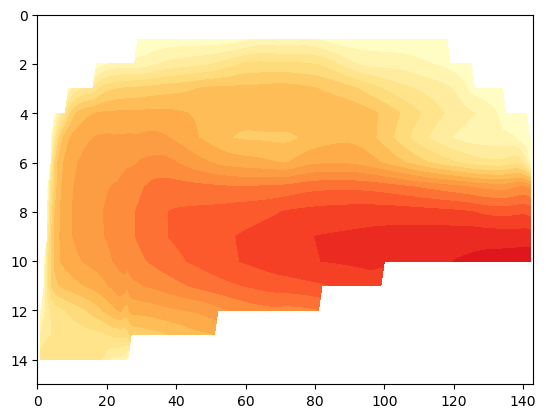

In [1681]:
age_layers_zonal=(agez_layers.sum('XC')/z_layers.sum('XC'))
plt.contourf((age_layers_zonal.T/31104000),cmap=plt.cm.YlOrRd,levels=np.linspace(0,1500,20),extend='both')
plt.gca().invert_yaxis()

/var/folders/95/kqnc1xrn05zcmk1f2dtc1ldc0000gp/T/ipykernel_17661/311636521.py:8: RuntimeWarning: invalid value encountered in true_divide
  age_layers_np_bounds=agez_layers_np_bounds/z_layers_np_bounds
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Text(0.5, 0.98, 'age interpolated onto isopycnals nobvp')

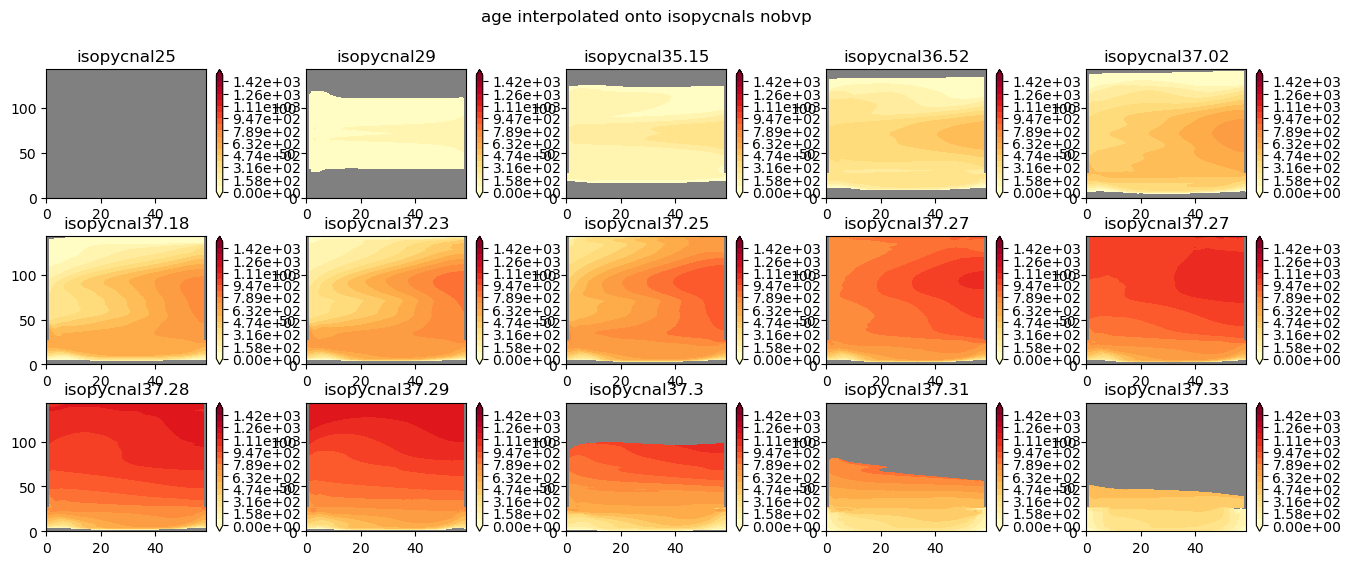

In [1683]:
agez_layers_np=agez_layers.load().data
z_layers_np=z_layers.load().data
agez_layers_np.shape
agez_layers_np_bounds=0*agez_layers_np
z_layers_np_bounds=0*z_layers_np
agez_layers_np_bounds[:,:,1:]=(agez_layers_np[:,:,1:]+agez_layers_np[:,:,0:-1])
z_layers_np_bounds[:,:,1:]=(z_layers_np[:,:,1:]+z_layers_np[:,:,0:-1])
age_layers_np_bounds=agez_layers_np_bounds/z_layers_np_bounds

fig = plt.figure(figsize=(16,6))
for i in range(0,Nlayersbin-1):
    plt.subplot(3,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    im=plt.contourf((age_layers_np_bounds[:,:,i]/31104000),cmap=plt.cm.YlOrRd,levels=np.linspace(0,1500,20),extend='both')
    plt.colorbar(format="%.2e")
    plt.title(f"isopycnal{layers1_bounds[i]:.4g}")
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey")  
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle('age interpolated onto isopycnals nobvp')





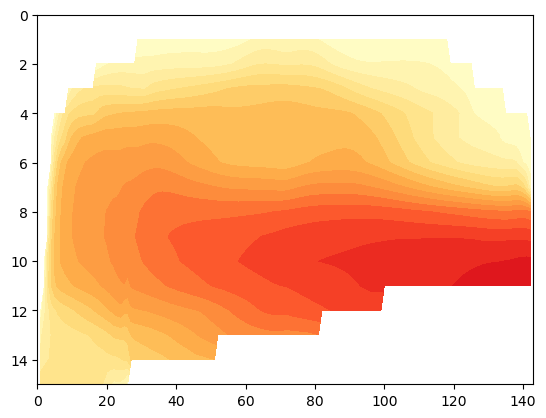

In [1689]:
#agez_layers_np_bounds=
#agez_layers_np_bounds_xr=agez_layers.fillna(0)*0+agez_layers_np_bounds
agez_layers_np_bounds_xr=agez_layers.fillna(0)*0+agez_layers_np_bounds
z_layers_np_bounds_xr=z_layers.fillna(0)*0+z_layers_np_bounds
agez_layers_bounds_zonal=agez_layers_np_bounds_xr.sum('XC')/z_layers_np_bounds_xr.sum('XC')
age_layers_zonal=(agez_layers.sum('XC')/z_layers.sum('XC'))
plt.contourf((agez_layers_bounds_zonal.T/31104000),cmap=plt.cm.YlOrRd,levels=np.linspace(0,1500,20),extend='both')
plt.gca().invert_yaxis()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


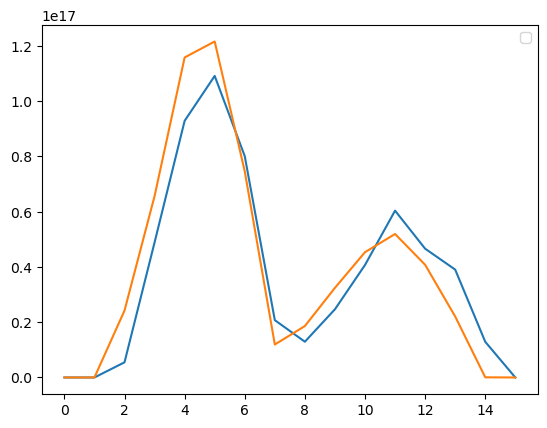

In [1727]:
ageflux_layers3D=age_layers_np_bounds*dia_layers_3D
ageflux_layers3D=ageflux_layers3D.fillna(0)
totageflux_layers=ageflux_layers3D.sum('XC').sum('YC')
dia_layers_3D_zonal=dia_layers_3D.sum('XC')
totageflux_layers_zonalmul=(dia_layers_3D_zonal*age_layers_zonal).sum('YC')
plt.plot(totageflux_layers)
plt.plot(totageflux_layers_zonalmul)
plt.legend()


#plt.plot(sumdivadv_rho,'.-',label='advflux')
#ageflux_layers3D=dia_layers_3D*0+ageflux_layers3D_np

Text(0.5, 0, 'streamflux(Sv)')

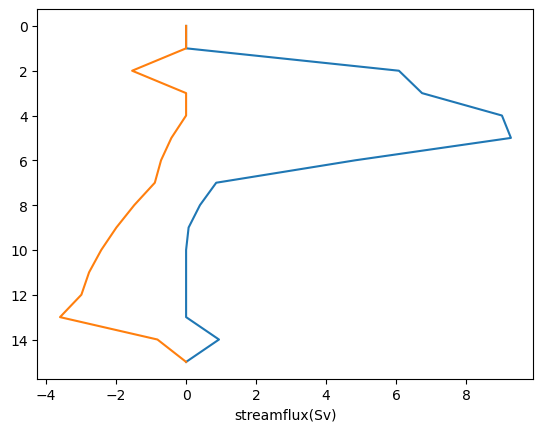

In [1756]:
plt.figure()
plt.plot(streamflux_upper,np.arange(Nlayersbin))
plt.plot(streamflux_lower,np.arange(Nlayersbin))
plt.gca().invert_yaxis()
plt.xlabel('streamflux(Sv)')

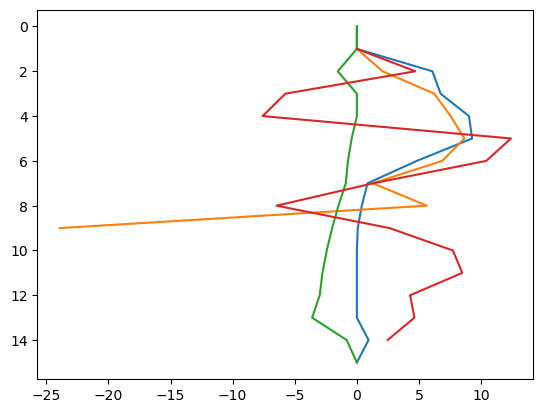

In [1781]:

plt.figure()
latidxr=xr.ones_like(agez_layers_np_bounds_xr)
latidxr=latidxr.cumsum('YC')-1
upmask=latidxr<maxids
downmask=latidxr>=maxids
rA=dsGM2x.rA.copy()
mask=upmask
upage_area=(agez_layers_np_bounds_xr*rA).where(mask).sum('XC').sum('YC')/(z_layers_np_bounds_xr*rA).where(mask).sum('XC').sum('YC')
mask=downmask
downage_area=(agez_layers_np_bounds_xr*rA).where(mask).sum('XC').sum('YC')/(z_layers_np_bounds_xr*rA).where(mask).sum('XC').sum('YC')
plt.plot(streamflux_upper,np.arange(Nlayersbin))
plt.plot(totageflux_layers/(upage_area-downage_area)/1e6,np.arange(Nlayersbin))
#plt.gca().invert_yaxis()
#plt.figure()
upmask=latidxr>=minids
downmask=latidxr<minids
rA=dsGM2x.rA.copy()
mask=upmask
upage_area=(agez_layers_np_bounds_xr*rA).where(mask).sum('XC').sum('YC')/(z_layers_np_bounds_xr*rA).where(mask).sum('XC').sum('YC')
mask=downmask
downage_area=(agez_layers_np_bounds_xr*rA).where(mask).sum('XC').sum('YC')/(z_layers_np_bounds_xr*rA).where(mask).sum('XC').sum('YC')

plt.plot(streamflux_lower,np.arange(Nlayersbin))
plt.plot(totageflux_layers/(upage_area-downage_area)/1e6,np.arange(Nlayersbin))
plt.gca().invert_yaxis()


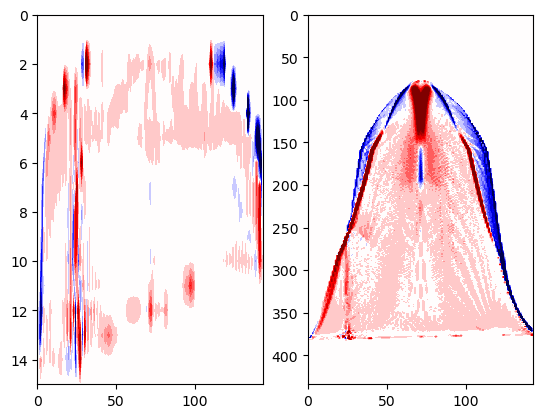

In [1690]:
plt.subplot(1,2,1)
dia_xlayers=grid.diff(PsiX_layers_zonalsum,'Y')/dsGM2x.dyG[:,0]
plt.contourf(dia_xlayers.T,levels=np.linspace(-10,10,20),vmin=-10,vmax=10,extend='both',cmap='seismic')
#plt.contourf(dia_xlayers.T,cmap='seismic')
#PsiX_layers_zonalsum
#plt.colorbar()
plt.gca().invert_yaxis()
dia_xlayers
plt.subplot(1,2,2)
varpi = ((grid.diff(grid.cumsum(dsGM2xADVForm.LaUH1RHO,'1RHO',boundary='fill')*dsGM2xADVForm.dyG, 'X',boundary='periodic') + 
             grid.diff(grid.cumsum(dsGM2xADVForm.LaVH1RHO,'1RHO',boundary='fill')*dsGM2xADVForm.dxG, 'Y',boundary='fill'))
          / grid.interp(dsGM2xADVForm.dyG,'X',boundary='fill')).sum('XC')
varpi=varpi.mean('time')
plt.contourf(varpi,levels=np.linspace(-10,10,20),vmin=-10,vmax=10,extend='both',cmap='seismic')
#varpi.plot.contourf(levels=np.linspace(-10,10,20),vmin=-10,vmax=10,extend='both',cmap='seismic')
plt.gca().invert_yaxis()


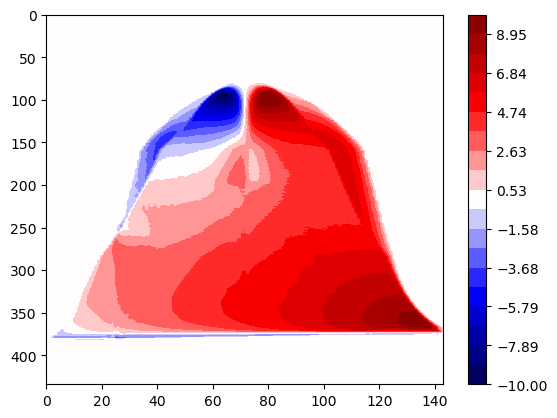

In [1564]:
ROC1=grid.cumsum((dsGM2xADVForm.LaVH1RHO*dsGM2xADVForm.dxG).mean('time').sum('XC'),'1RHO',boundary='fill').load()

plt.contourf(ROC1/1e6,levels=np.linspace(-10,10,20),vmin=-10,vmax=10,cmap='seismic')
plt.colorbar()
plt.gca().invert_yaxis()

Text(0.5, 0.98, 'diapycnal age advection transport(Euler+gm)')

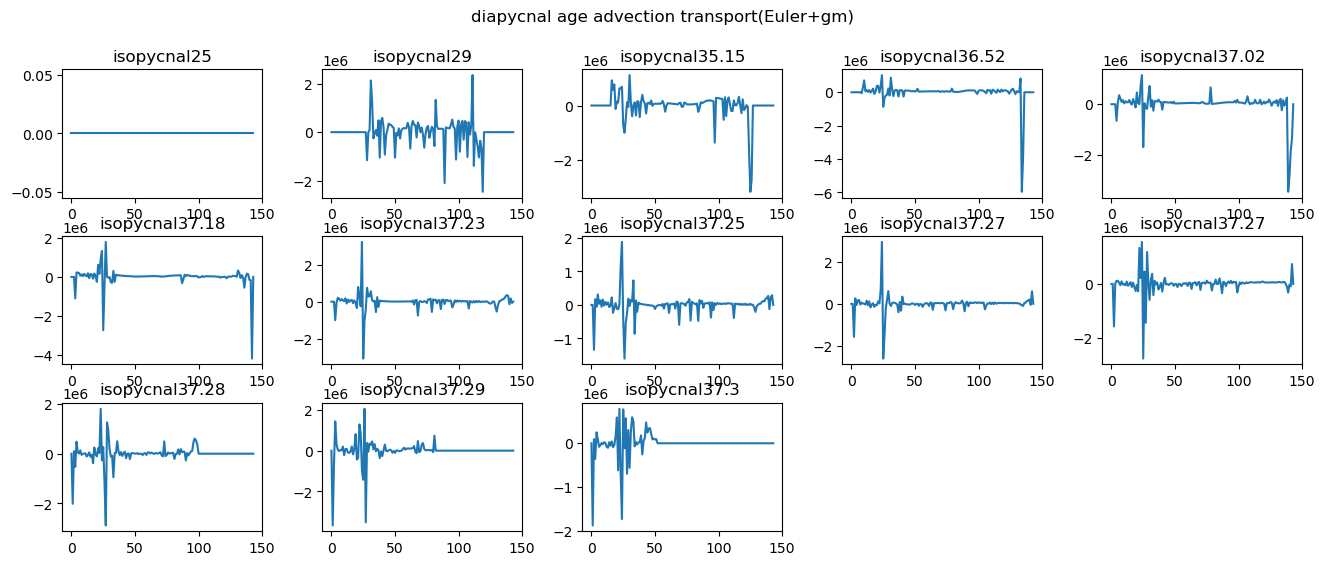

In [1565]:
diaVoladvnobvp_zonalsum=np.sum(diaVoladvnobvp,axis=2)
fig = plt.figure(figsize=(16,6))
for i in range(0,Nlayersbin-1):
    plt.subplot(3,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    plt.plot(diaVoladvnobvp_zonalsum[i,:])
    plt.title(f"isopycnal{layers1_bounds[i]:.4g}")
    plt.xlabel('')
    plt.ylabel('')
    #plt.gca().set_facecolor("grey") 
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle('diapycnal age advection transport(Euler+gm)')

/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Text(0.5, 0.98, 'diapycnal age advection transport(Eulerian+gm)')

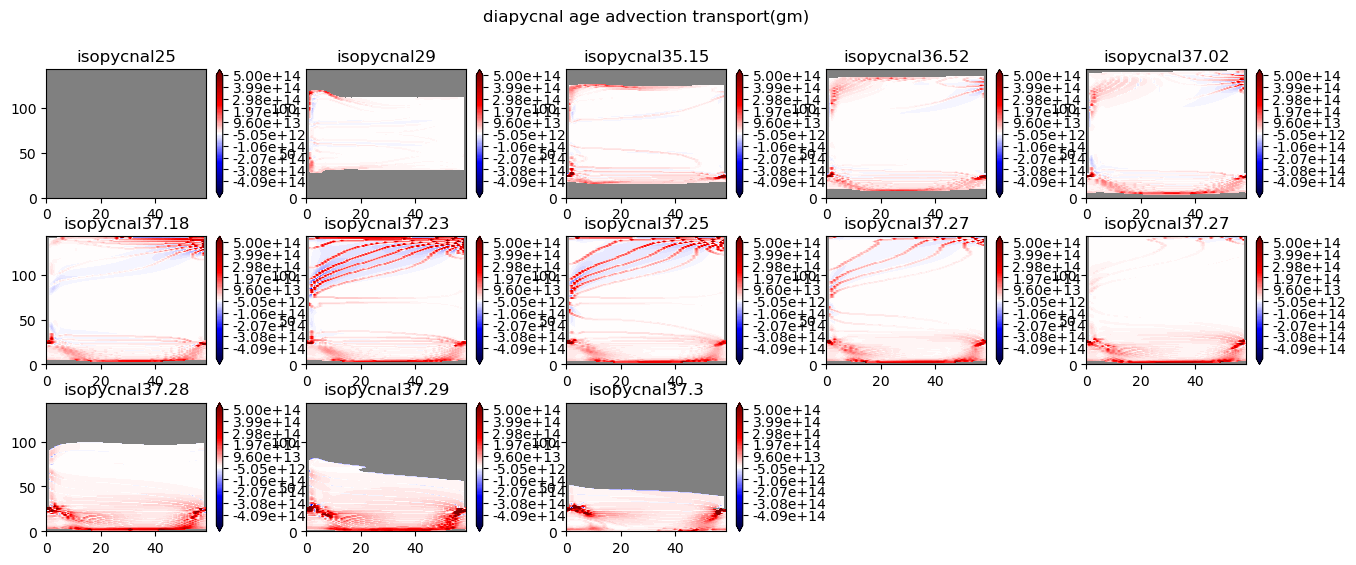

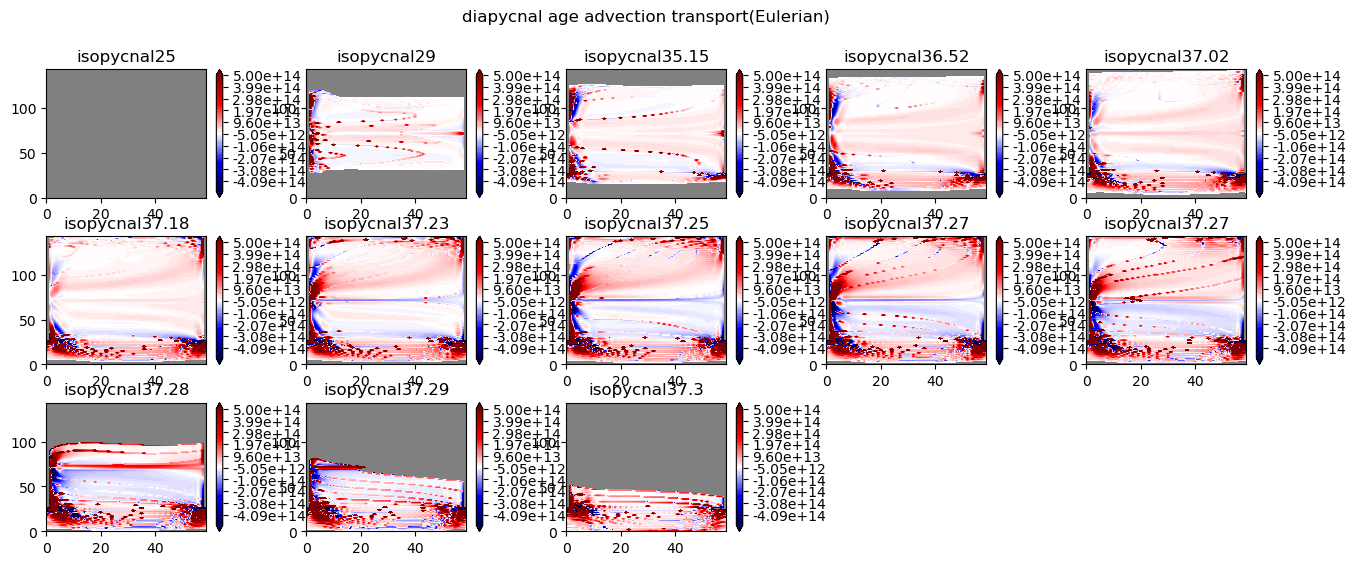

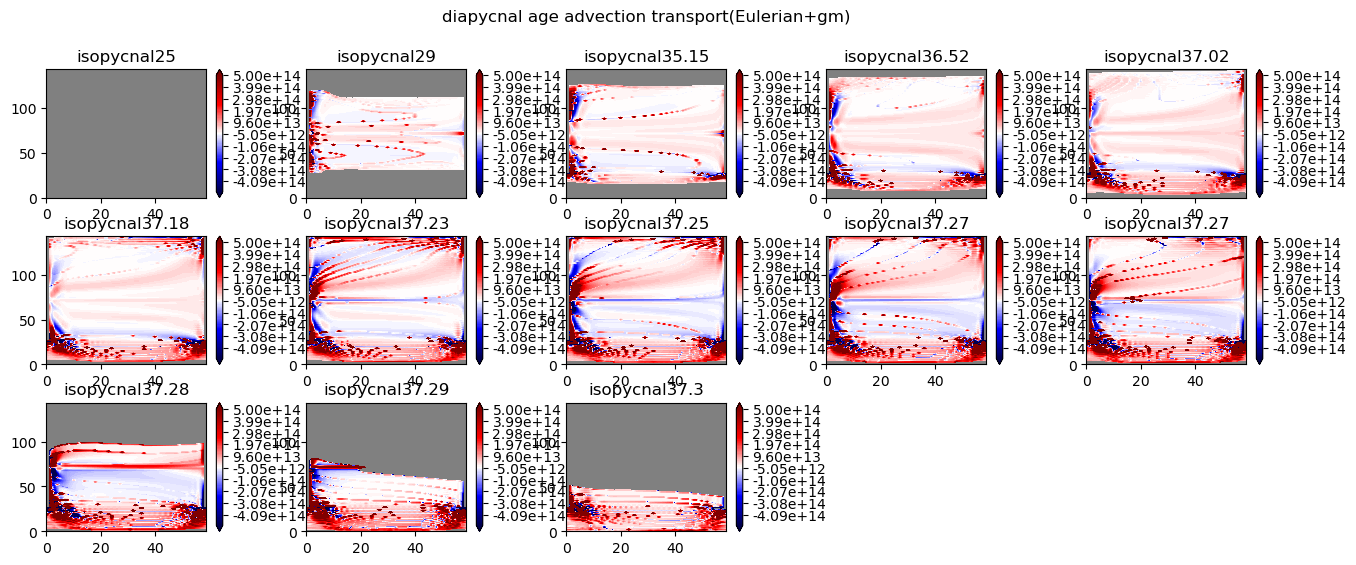

In [1566]:
fig = plt.figure(figsize=(16,6))
diaVoladvEufluxrhotemp=diaageadvgmfluxrho.copy()
diaVoladvEufluxrhotemp[diaVoladvEufluxrhotemp==0]=np.nan
for i in range(0,Nlayersbin-1):
    plt.subplot(3,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    im=plt.contourf(diaVoladvEufluxrhotemp[i,:,:],levels=np.linspace(-0.5e15,0.5e15,100),cmap='seismic',extend='both')
    plt.colorbar(format="%.2e")
    plt.title(f"isopycnal{layers1_bounds[i]:.4g}")
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey") 
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle('diapycnal age advection transport(gm)')
fig = plt.figure(figsize=(16,6))
diaVoladvEufluxrhotemp=diaageadvEufluxrho.copy()
diaVoladvEufluxrhotemp[diaVoladvEufluxrhotemp==0]=np.nan
for i in range(0,Nlayersbin-1):
    plt.subplot(3,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    im=plt.contourf(diaVoladvEufluxrhotemp[i,:,:],levels=np.linspace(-0.5e15,0.5e15,100),cmap='seismic',extend='both')
    plt.colorbar(format="%.2e")
    plt.title(f"isopycnal{layers1_bounds[i]:.4g}")
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey") 
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle('diapycnal age advection transport(Eulerian)')
fig = plt.figure(figsize=(16,6))
diaVoladvEufluxrhotemp=diaageadvfluxrho.copy()
diaVoladvEufluxrhotemp[diaVoladvEufluxrhotemp==0]=np.nan
for i in range(0,Nlayersbin-1):
    plt.subplot(3,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    im=plt.contourf(diaVoladvEufluxrhotemp[i,:,:],levels=np.linspace(-0.5e15,0.5e15,100),cmap='seismic',extend='both')
    plt.colorbar(format="%.2e")
    plt.title(f"isopycnal{layers1_bounds[i]:.4g}")
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey") 
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle('diapycnal age advection transport(Eulerian+gm)')




Text(0.5, 0.98, 'age interpolated onto isopycnals nobvp')

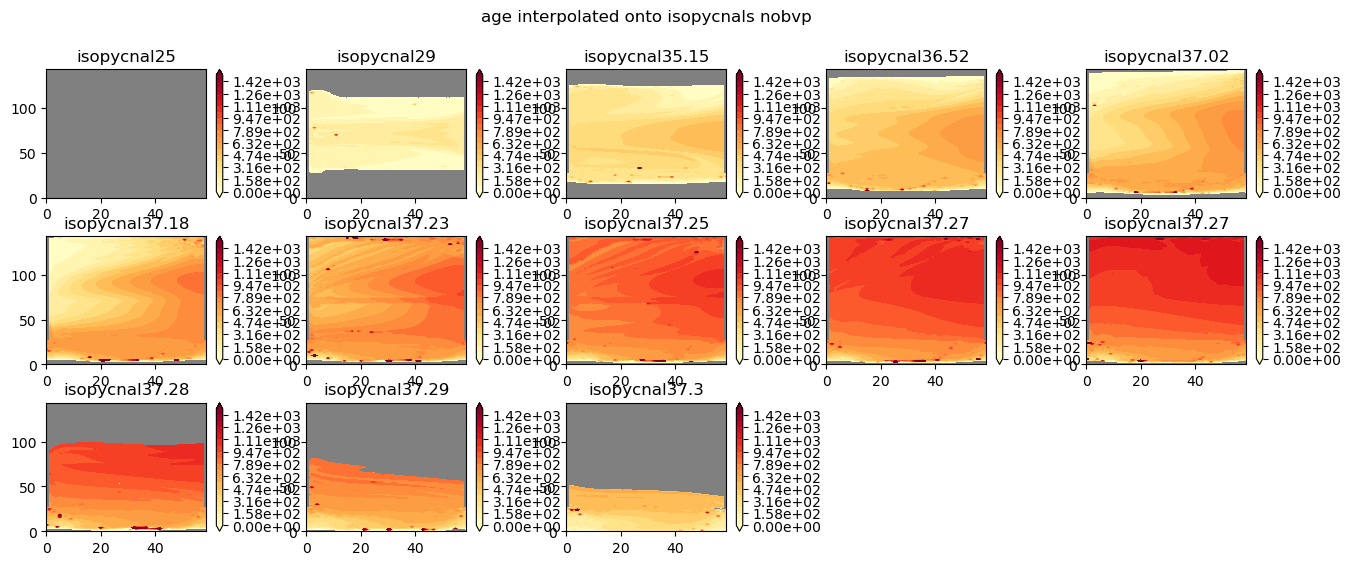

In [1567]:
agetmean=diaagerho_nobvp.copy()/31104000
agetmean[agetmean==0]=np.nan
#agetmean[diaVoladvfluxrho<=1e-20]=np.nan
fig = plt.figure(figsize=(16,6))
for i in range(0,Nlayersbin-1):
    plt.subplot(3,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    im=plt.contourf(agetmean[i,:,:],cmap=plt.cm.YlOrRd,levels=np.linspace(0,1500,20),extend='both')
    plt.colorbar(format="%.2e")
    plt.title(f"isopycnal{layers1_bounds[i]:.4g}")
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey")  
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle('age interpolated onto isopycnals nobvp')
#cbar_ax = fig.add_axes([0.95, 0.25, 0.01, 0.53])
#fig.colorbar(im,cbar_ax,label='diafluxrho3D')

Text(0.5, 0.98, 'diapycnal Volume transport(Eulerian+gm nobvp)')

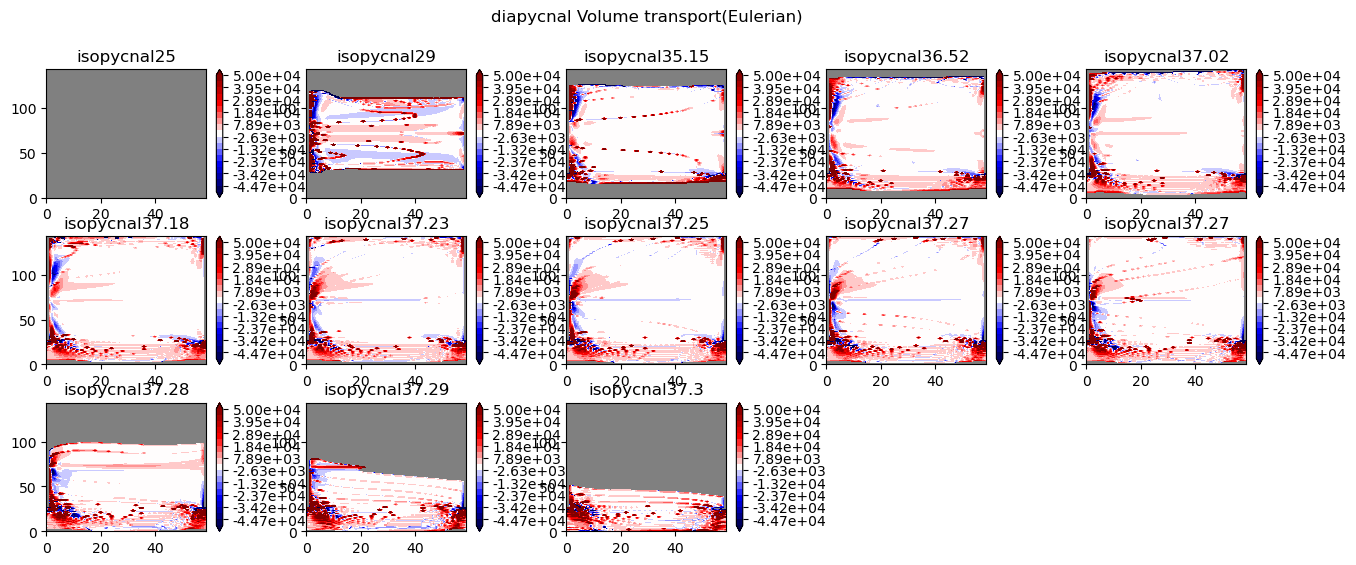

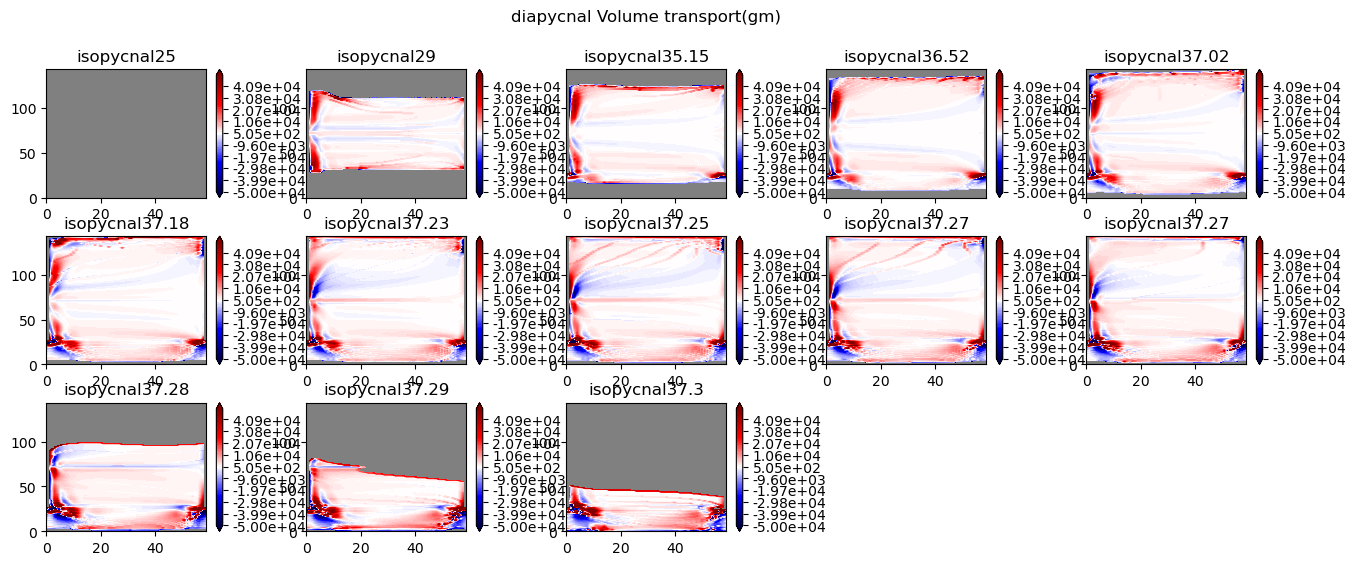

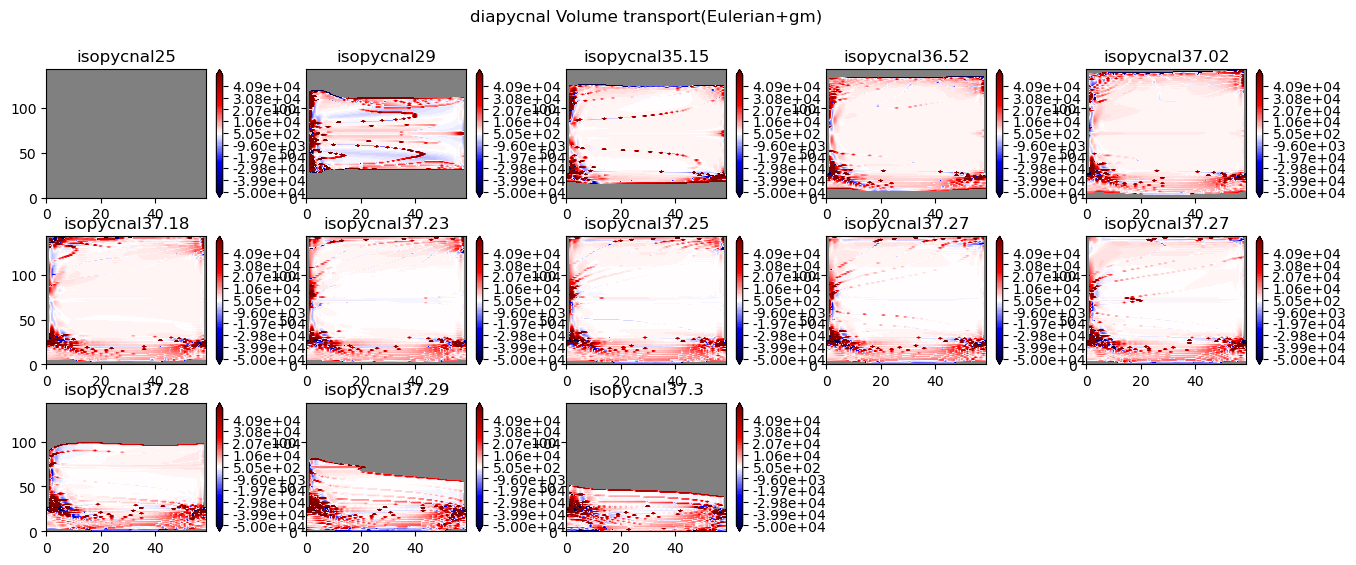

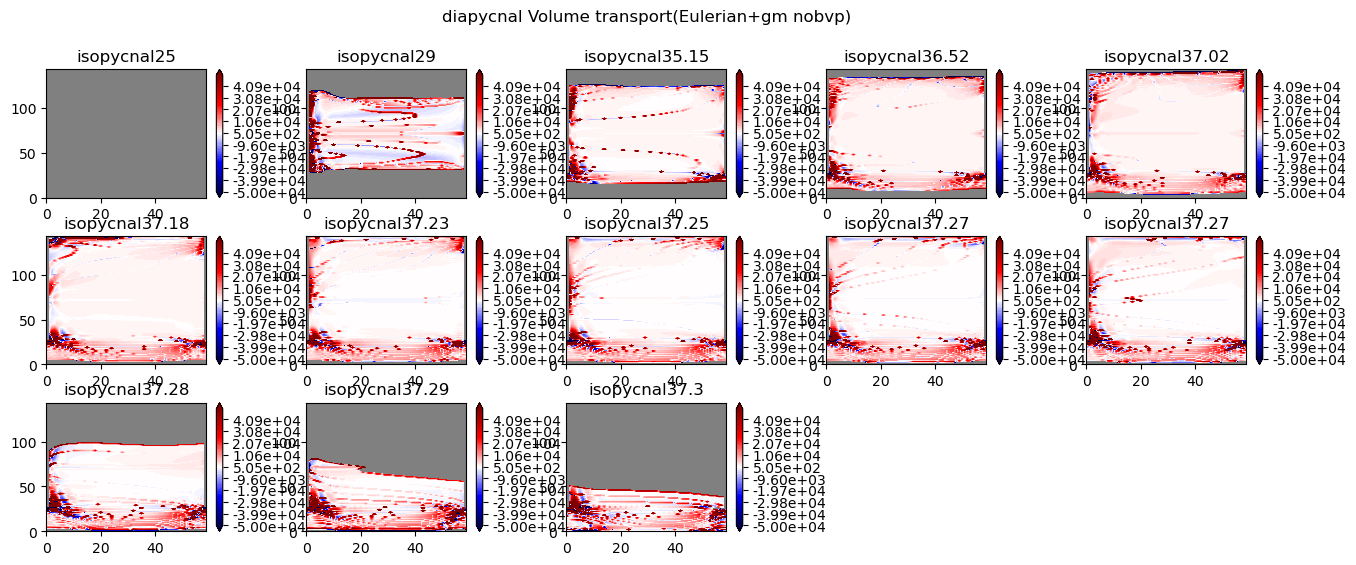

In [1568]:
fig = plt.figure(figsize=(16,6))
diaVoladvEufluxrhotemp=diaVoladvEufluxrho.copy()
diaVoladvEufluxrhotemp[diaVoladvEufluxrhotemp==0]=np.nan
for i in range(0,Nlayersbin-1):
    plt.subplot(3,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    im=plt.contourf(diaVoladvEufluxrhotemp[i,:,:],levels=np.linspace(-0.5e5,0.5e5,20),cmap='seismic',extend='both')
    plt.colorbar(format="%.2e")
    plt.title(f"isopycnal{layers1_bounds[i]:.4g}")
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey") 
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle('diapycnal Volume transport(Eulerian)')

fig = plt.figure(figsize=(16,6))
diaVoladvfluxrhotemp=diaVoladvgmfluxrho.copy()
diaVoladvfluxrhotemp[diaVoladvfluxrhotemp==0]=np.nan
for i in range(0,Nlayersbin-1):
    plt.subplot(3,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    im=plt.contourf(diaVoladvfluxrhotemp[i,:,:],levels=np.linspace(-0.5e5,0.5e5,100),cmap='seismic',extend='both')
    plt.colorbar(format="%.2e")
    plt.title(f"isopycnal{layers1_bounds[i]:.4g}")
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey") 
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle('diapycnal Volume transport(gm)')
fig = plt.figure(figsize=(16,6))
diaVoladvEufluxrhotemp=(diaVoladvEufluxrho+diaVoladvgmfluxrho).copy()
diaVoladvEufluxrhotemp[diaVoladvEufluxrhotemp==0]=np.nan
for i in range(0,Nlayersbin-1):
    plt.subplot(3,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    im=plt.contourf(diaVoladvEufluxrhotemp[i,:,:],levels=np.linspace(-0.5e5,0.5e5,100),cmap='seismic',extend='both')
    plt.colorbar(format="%.2e")
    plt.title(f"isopycnal{layers1_bounds[i]:.4g}")
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey") 
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle('diapycnal Volume transport(Eulerian+gm)')
fig = plt.figure(figsize=(16,6))
diaVoladvEufluxrhotemp=(diaVoladvnobvp).copy()
diaVoladvEufluxrhotemp[diaVoladvEufluxrhotemp==0]=np.nan
for i in range(0,Nlayersbin-1):
    plt.subplot(3,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    im=plt.contourf(diaVoladvEufluxrhotemp[i,:,:],levels=np.linspace(-0.5e5,0.5e5,100),cmap='seismic',extend='both')
    plt.colorbar(format="%.2e")
    plt.title(f"isopycnal{layers1_bounds[i]:.4g}")
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey") 
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle('diapycnal Volume transport(Eulerian+gm nobvp)')


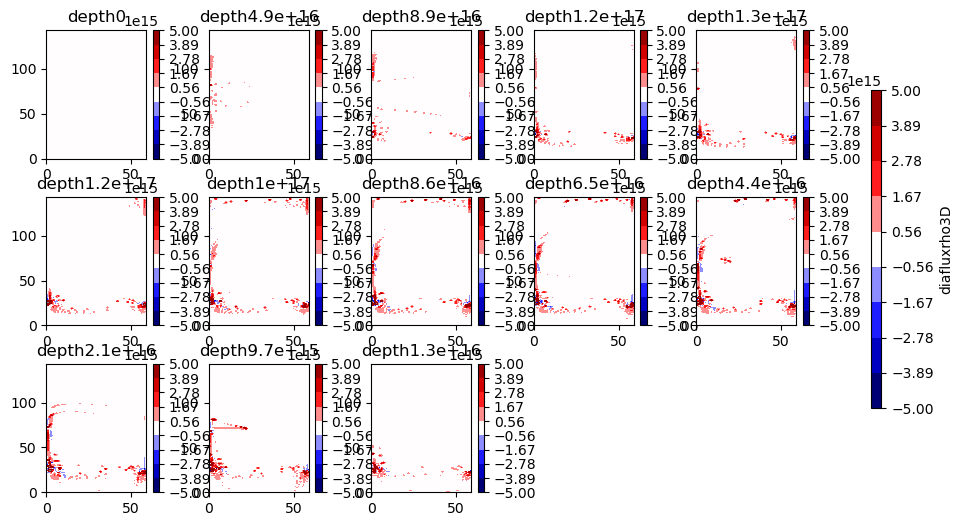

In [1569]:
fig = plt.figure(figsize=(10,6))
for i in range(0,Nlayersbin-1):
    plt.subplot(3,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    im=plt.contourf(diafluxrho3D[i,:,:],cmap='seismic',levels=np.linspace(-0.5e16,0.5e16,10))
    plt.colorbar()
    plt.title(f"depth{np.sum(diafluxrho3D[i,:,:]):.2g}")
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey")  
fig.subplots_adjust(wspace=0.3,hspace=0.3)
cbar_ax = fig.add_axes([0.95, 0.25, 0.01, 0.53])
fig.colorbar(im,cbar_ax,label='diafluxrho3D')

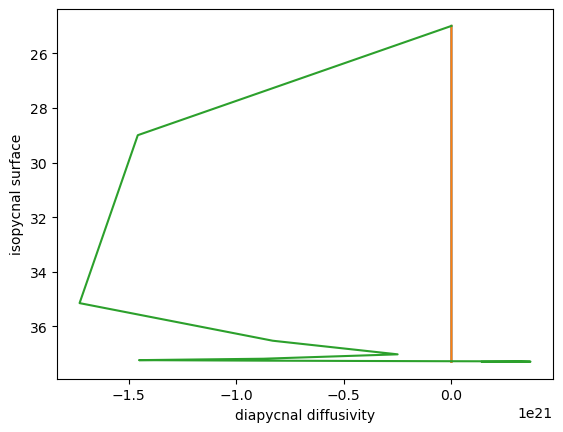

In [1570]:


fdia_my=-kdia3d*agezgrad.fillna(0)*dsGM2x.rA
diadiffflux3D=diaFluxOnRho_3D(fx=0*fdia.load().data,fy=0*fdia.load().data,fz=fdia_my.load().data,rhoindex0=rhoindex0,rhoidcur=np.arange(0,Nlayersbin-1))
diadiffflux_hsum=np.sum(np.sum(diadiffflux3D,axis=2),axis=1)
ax=plt.plot(diadiffflux_hsum,layers1_bounds[0:Nlayersbin-1])

plt.xlabel('diapycnal diffusivity')
plt.ylabel('isopycnal surface')
plt.gca().invert_yaxis()
#agezgrad
#fdia
diadiffflux3D=diaFluxOnRho_3D(fx=0*fdia.load().data,fy=0*fdia.load().data,fz=fdia.load().data,rhoindex0=rhoindex0,rhoidcur=np.arange(0,Nlayersbin-1))
diadiffflux_hsum=np.sum(np.sum(diadiffflux3D,axis=2),axis=1)
ax=plt.plot(diadiffflux_hsum,layers1_bounds[0:Nlayersbin-1])


plt.xlabel('diapycnal diffusivity')
plt.ylabel('isopycnal surface')
plt.gca().invert_yaxis()
agezgrad_rA=agezgrad*dsGM2x.rA
agezgrad_rA=agezgrad_rA.fillna(0)
diasum_agezgrad_rA_3D=diaFluxOnRho_3D(fx=0*agezgrad_rA.load().data,fy=0*agezgrad_rA.load().data,fz=agezgrad_rA.load().data,rhoindex0=rhoindex0,rhoidcur=np.arange(0,Nlayersbin-1))
diasum_agezgrad_rA_3D_hsum=np.sum(np.sum(diasum_agezgrad_rA_3D,axis=2),axis=1)
#effect_kdia=diadiffflux_hsum/(diasum_agezgrad_rA_3D_hsum+1e-20)
plt.plot(diasum_agezgrad_rA_3D_hsum,layers1_bounds[0:Nlayersbin-1])
plt.xlabel('diapycnal diffusivity')
plt.ylabel('isopycnal surface')
plt.gca().invert_yaxis()


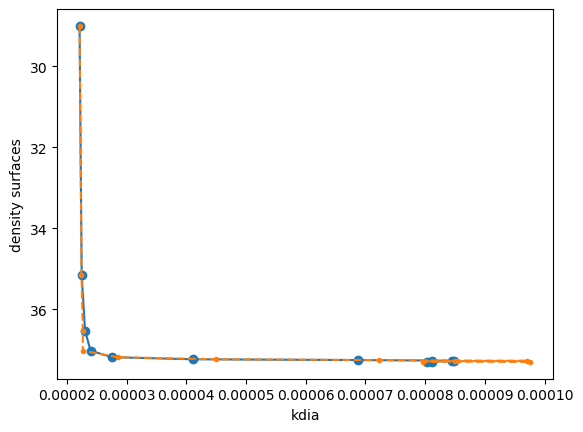

In [1571]:
kdia_infer_diainterp_2D=-diadiffflux3D/(diasum_agezgrad_rA_3D+1e-20)
kdia_infer_diainterp_2D_hsum=np.mean(np.mean(kdia_infer_diainterp_2D,axis=2),axis=1)
kdia_infer_diainterp=-diadiffflux_hsum/(diasum_agezgrad_rA_3D_hsum+1e-20)
kdia3d_rA=kdia3d*dsGM2x.rA
rA3d=0*kdia3d+dsGM2x.rA
kdia_rA_diainterp=diaFluxOnRho_3D(fx=0*kdia3d_rA.load().data,fy=0*kdia3d_rA.load().data,fz=kdia3d_rA.load().data,rhoindex0=rhoindex0,rhoidcur=np.arange(0,Nlayersbin-1))
rA_diainterp=diaFluxOnRho_3D(fx=0*rA3d.load().data,fy=0*rA3d.load().data,fz=rA3d.load().data,rhoindex0=rhoindex0,rhoidcur=np.arange(0,Nlayersbin-1))
kdia_diainterp=kdia_rA_diainterp/(rA_diainterp+1e-20)
'''
This line below does not look perfectly correct,when calculating mean value,
the extra 0 values should be masked. On the other hand, 
the 0 values are not a great concern when doing sum.
'''

#Mask_kdia_diainterp=(kdia_diainterp!=0)
kdia_diainterp_hsum=np.sum(np.sum(kdia_rA_diainterp,axis=2),axis=1)/(np.sum(np.sum(rA_diainterp+1e-30,axis=2),axis=1))

plt.plot(kdia_diainterp_hsum[1:],layers1_bounds[1:Nlayersbin-1],'o-')
plt.plot(kdia_infer_diainterp[1:],layers1_bounds[1:Nlayersbin-1],'.--')
#plt.plot(kdia_infer_diainterp_2D_hsum[1:],layers1_bounds[1:Nlayersbin-1],'o')

plt.xlabel('kdia')
plt.ylabel('density surfaces')
plt.gca().invert_yaxis()

/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/boerzhang/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Text(0.5, 0.98, 'kdia isopycanl mean')

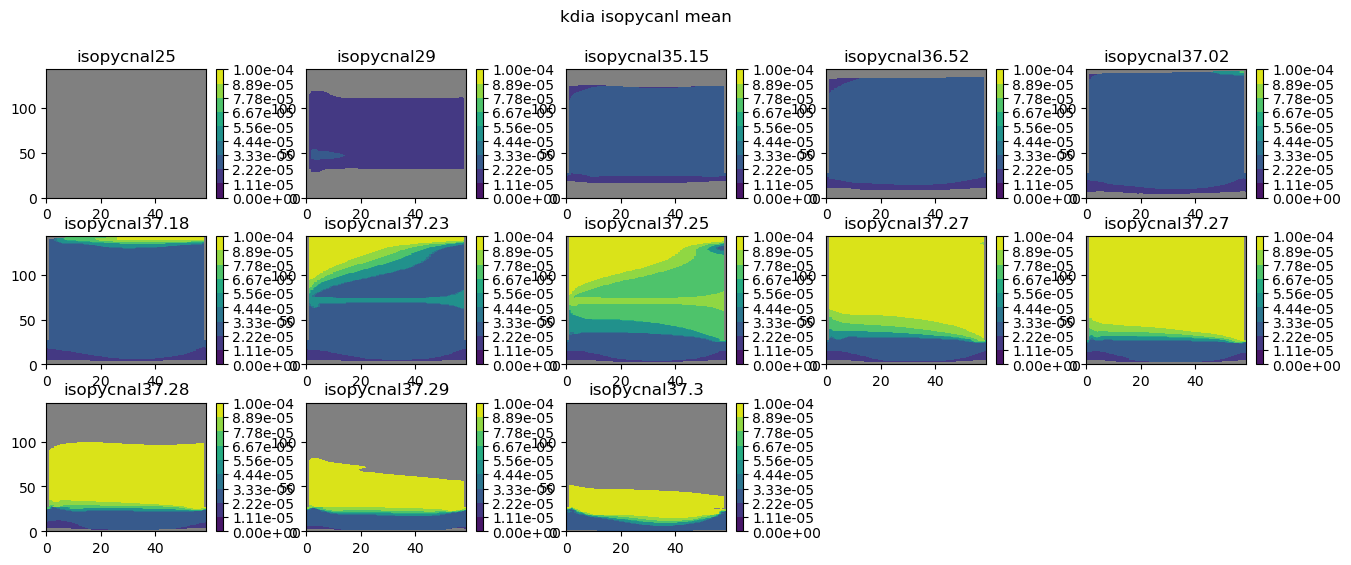

In [1572]:
fig = plt.figure(figsize=(16,6))
kdia_diainterp[kdia_diainterp==0]=np.nan
for i in range(0,Nlayersbin-1):
    plt.subplot(3,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    im=plt.contourf(kdia_diainterp[i,:,:],levels=np.linspace(0,1e-4,10))
    plt.colorbar(format="%.2e")
    plt.title(f"isopycnal{layers1_bounds[i]:.4g}")
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey")  
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle('kdia isopycanl mean')
#cbar_ax = fig.add_axes([0.95, 0.25, 0.01, 0.53])
#fig.colorbar(im,cbar_ax,label='diafluxrho3D')

Text(0.5, 0.98, 'diapycanl diffusive flux on isopycnals')

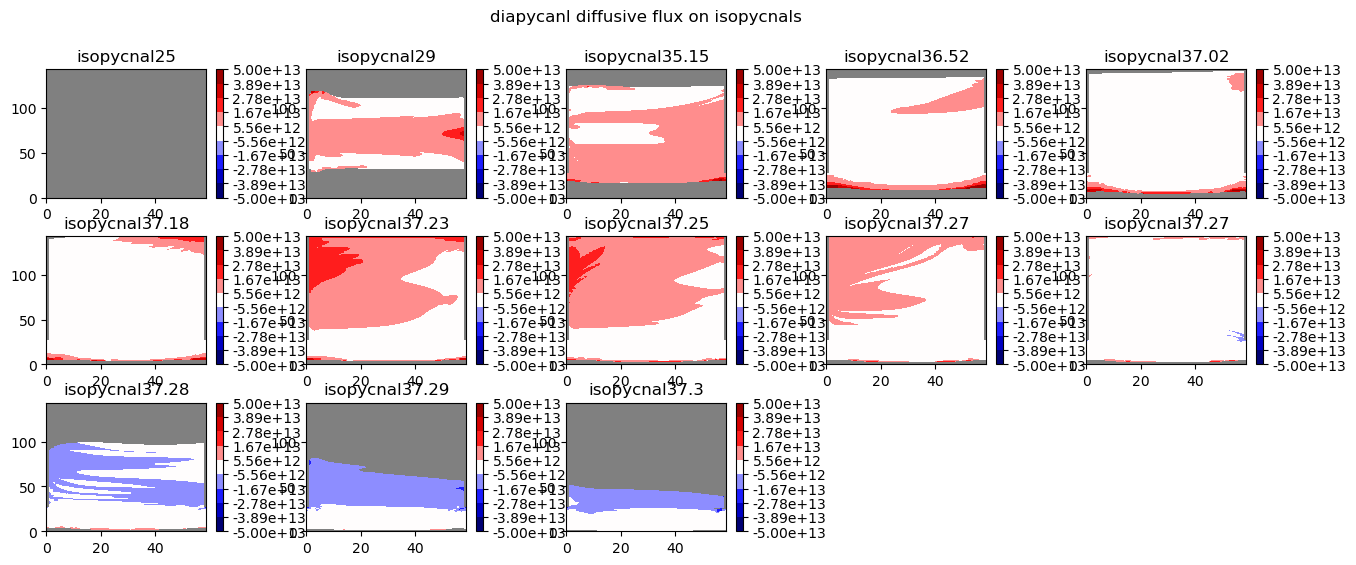

In [1573]:
fig = plt.figure(figsize=(16,6))
diadiffflux3D[diadiffflux3D==0]=np.nan
for i in range(0,Nlayersbin-1):
    plt.subplot(3,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    im=plt.contourf(diadiffflux3D[i,:,:],cmap='seismic',levels=np.linspace(-5e13,5e13,10))
    plt.colorbar(format="%.2e")
    plt.title(f"isopycnal{layers1_bounds[i]:.4g}")
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey")
    
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle('diapycanl diffusive flux on isopycnals')
#cbar_ax = fig.add_axes([0.95, 0.25, 0.01, 0.53])
#fig.colorbar(im,cbar_ax,label='diafluxrho3D')

Text(0.5, 0.98, 'agezgrad*rA on isopycnals')

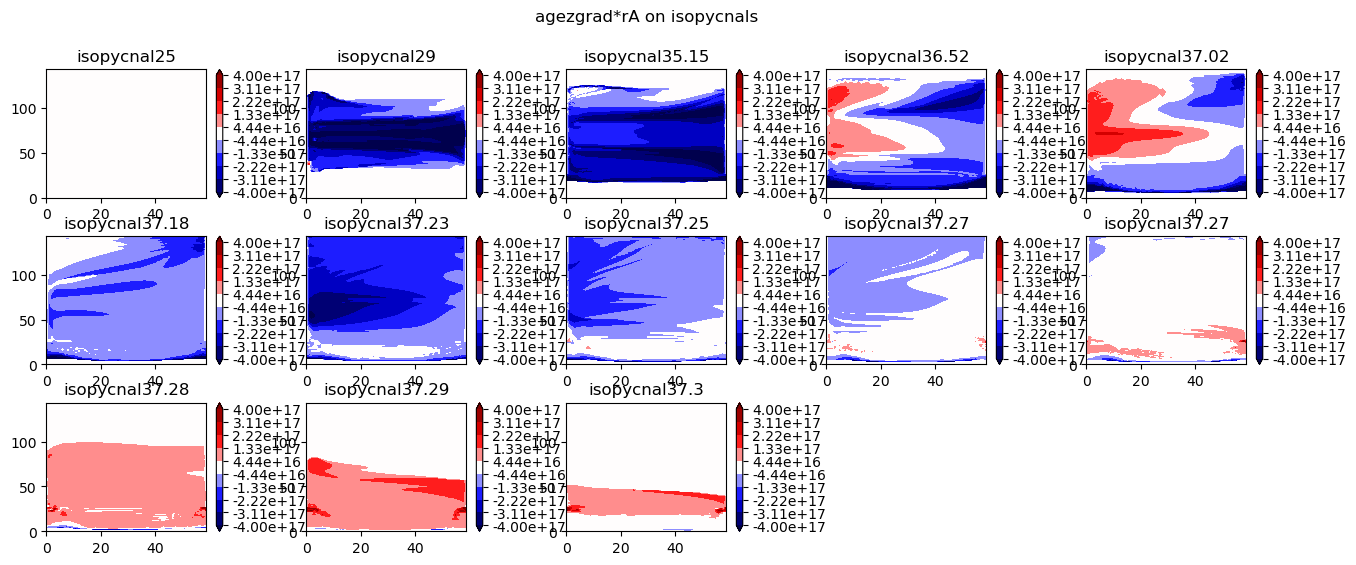

In [1574]:
fig = plt.figure(figsize=(16,6))
for i in range(0,Nlayersbin-1):
    plt.subplot(3,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=(dsGM2x.ADVrTr01+AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    #im=(AgefluxGM).where(dsGM2x.ADVrTr01!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False,extend='both')
    im=plt.contourf(diasum_agezgrad_rA_3D[i,:,:],cmap='seismic',levels=np.linspace(-4e17,4e17,10),extend='both')
    plt.colorbar(format="%.2e")
    plt.title(f"isopycnal{layers1_bounds[i]:.4g}")
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey")  
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle('agezgrad*rA on isopycnals')
#cbar_ax = fig.add_axes([0.95, 0.25, 0.01, 0.53])
#fig.colorbar(im,cbar_ax,label='diafluxrho3D')

In [1575]:
'''
age=dsGM2x.PTRtave01
age=age.where(age!=0)
#age at Zl
agel=grid.interp(age, 'Z',boundary='fill')
fig = plt.figure(figsize=(10,12))
for i in range(0,30):
    plt.subplot(6,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=dsGM2x.W.where(dsGM2x.W!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False)
    #im=(agel).where(dsGM2x.W!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e4,add_colorbar=False,extend='neither')
    im=(PsixGM_Tensor).isel(Zl=i).plot.contourf(levels=np.linspace(-1.8,1.8,20),add_colorbar=False,extend='neither',cmap='seismic')

    #plt.colorbar()
    plt.title("depth"+str(dsGM2x.Zl[i].data))
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey")  
fig.subplots_adjust(wspace=0.3,hspace=0.3)
cbar_ax = fig.add_axes([0.95, 0.25, 0.01, 0.53])
fig.colorbar(im,cbar_ax,label='GM_PsiX_fromTensor')
age=dsGM2x.PTRtave01
age=age.where(age!=0)
#age at Zl
agel=grid.interp(age, 'Z',boundary='fill')
fig = plt.figure(figsize=(10,12))
for i in range(0,30):
    plt.subplot(6,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=dsGM2x.W.where(dsGM2x.W!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False)
    #im=(agel).where(dsGM2x.W!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e4,add_colorbar=False,extend='neither')
    im=(GM_PsiX_nobvp-PsixGM_Tensor).isel(Zl=i).plot.contourf(levels=np.linspace(-1.8,1.8,20),add_colorbar=False,extend='neither',cmap='seismic')

    #plt.colorbar()
    plt.title("depth"+str(dsGM2x.Zl[i].data))
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey")  
fig.subplots_adjust(wspace=0.3,hspace=0.3)
cbar_ax = fig.add_axes([0.95, 0.25, 0.01, 0.53])
fig.colorbar(im,cbar_ax,label='GM_PsiX_diagnosed_nobvp-GM_PsiX_fromTensor')
age=dsGM2x.PTRtave01
age=age.where(age!=0)
#age at Zl
agel=grid.interp(age, 'Z',boundary='fill')
fig = plt.figure(figsize=(10,12))
for i in range(0,30):
    plt.subplot(6,5, i+1)
    #dsGM2x.ADVrTr01.isel(Zl=i).mean('time').plot.contourf(levels=np.linspace(-4.5e-16,4.5e-16,20))
    #im=dsGM2x.W.where(dsGM2x.W!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e14,add_colorbar=False)
    #im=(agel).where(dsGM2x.W!=0).isel(Zl=i).mean('time').plot.contourf(levels=np.arange(-5,5.1,0.5)*1e4,add_colorbar=False,extend='neither')
    im=(GM_PsiX_nobvp).isel(Zl=i).plot.contourf(levels=np.linspace(-1.8,1.8,20),add_colorbar=False,extend='neither',cmap='seismic')

    #plt.colorbar()
    plt.title("depth"+str(dsGM2x.Zl[i].data))
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor("grey")  
fig.subplots_adjust(wspace=0.3,hspace=0.3)
cbar_ax = fig.add_axes([0.95, 0.25, 0.01, 0.53])
fig.colorbar(im,cbar_ax,label='GM_PsiX_diagnosed_nobvp')
'''
1

1

In [1576]:
agetmean=diaagerho/31104000
wVolumetmean=diaVoladvfluxrho.copy()
wVolumepos=wVolumetmean.copy()
wVolumepos[wVolumetmean<=0]=0
wVolumeneg=wVolumetmean.copy()
wVolumeneg[wVolumetmean>=0]=0
agepos=agetmean.copy()
agepos[wVolumetmean<=0]=0
ageneg=agetmean.copy()
ageneg[wVolumetmean>=0]=0
#wVolumeneg=wVolumetmean[wVolumetmean<0]
#ageneg=agetmean[wVolumetmean<0]

#agepos_areamean=grid.average(agepos,['X','Y'])
#ageneg_areamean=grid.average(ageneg,['X','Y'])
'''
agepos_fluxmean=grid.average(agepos*wVolumepos,['X','Y'])/grid.average(wVolumepos,['X','Y'])
ageneg_fluxmean=grid.average(ageneg*wVolumeneg,['X','Y'])/grid.average(wVolumeneg,['X','Y'])
deltaage_flux=-(ageneg_fluxmean-agepos_fluxmean)
deltaage_area=-(ageneg_areamean-agepos_areamean)
agepos_areamean.plot(y='Zl',label='ageup_area')
agepos_fluxmean.plot(y='Zl',label='ageup_flux')
ageneg_areamean.plot(y='Zl',label='agedown_area')
ageneg_fluxmean.plot(y='Zl',label='agedown_flux')
deltaage_flux.plot(y='Zl',label='deltaage_flux')
deltaage_area.plot(y='Zl',label='deltaage_area')
plt.legend()
'''
#diaVoladvfluxrho_hsum=np.sum(np.sum(wVolumeneg,axis=2),axis=1)
#diaVoladvfluxrho_hsum

"\nagepos_fluxmean=grid.average(agepos*wVolumepos,['X','Y'])/grid.average(wVolumepos,['X','Y'])\nageneg_fluxmean=grid.average(ageneg*wVolumeneg,['X','Y'])/grid.average(wVolumeneg,['X','Y'])\ndeltaage_flux=-(ageneg_fluxmean-agepos_fluxmean)\ndeltaage_area=-(ageneg_areamean-agepos_areamean)\nagepos_areamean.plot(y='Zl',label='ageup_area')\nagepos_fluxmean.plot(y='Zl',label='ageup_flux')\nageneg_areamean.plot(y='Zl',label='agedown_area')\nageneg_fluxmean.plot(y='Zl',label='agedown_flux')\ndeltaage_flux.plot(y='Zl',label='deltaage_flux')\ndeltaage_area.plot(y='Zl',label='deltaage_area')\nplt.legend()\n"

ValueError: x and y must have same first dimension, but have shapes (21,) and (13,)

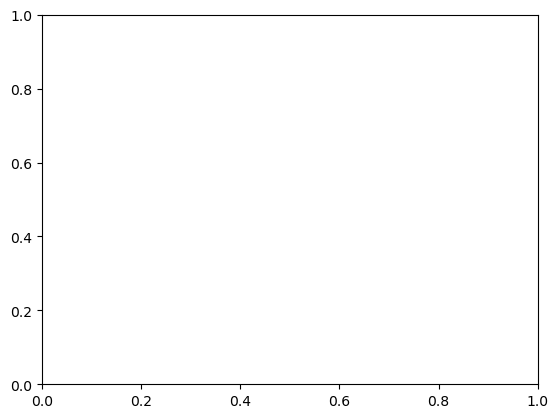

In [1577]:
plt.plot(sumdivdia_rho,np.r_[0:Nlayersbin-1],label='dia flux')
plt.plot(diadiffflux_hsum,np.r_[0:Nlayersbin-1],'o',label='dia flux')

sumdivdia_rho
plt.xlabel('diapycnal diffusivity')
plt.ylabel('isopycnal surface')
plt.gca().invert_yaxis()

In [ ]:
divtot_rhosum=divtot_rho.sum('XC').sum('YC')
divtot_rhosum=divtot_rhosum[::-1].cumsum('rho_coord')[::-1]
Vol_rhosum=Vol_rho.sum('XC').sum('YC')
Vol_rhosum=Vol_rhosum[::-1].cumsum('rho_coord')[::-1]
fsurf_rhosum=fsurf_rho.sum('XC').sum('YC')
fsurf_rhosum=fsurf_rhosum[::-1].cumsum('rho_coord')[::-1]
divtot_rhosum.plot()
Vol_rhosum.plot()
(divtot_rhosum-fsurf_rhosum).plot()

In [ ]:
divconv